# Partie 1 : Apprentissage non supervisé
(interprétation les clusters obtenus)

## Clean des données

### Import Source

In [104]:
import pandas as pd
import numpy as np

df=pd.read_csv("valeursfoncieres-2023.txt",sep="|", low_memory=False)

### Supprimer colonnes NaN

In [105]:
df = df.dropna(axis = 1, how = 'all')

### Pourcentage de Nan dans chaque colonnes

In [106]:
def pourcentage_nan_par_colonne(df):
    pourcentages_nan = {}
    total_lignes = len(df)
    
    for colonne in df.columns:
        nan_lignes = df[colonne].isna().sum()
        pourcentage = (nan_lignes / total_lignes) * 100
        pourcentages_nan[colonne] = pourcentage
    
    return pourcentages_nan

# Calculer les pourcentages de NaN pour chaque colonne
pourcentages_nan_colonnes = pourcentage_nan_par_colonne(df)
print("Le pourcentage de NaN dans la colonne")
for colonne, pourcentage in pourcentages_nan_colonnes.items():
    print(f"- '{colonne}' est : {pourcentage:.2f}%")

Le pourcentage de NaN dans la colonne
- 'No disposition' est : 0.00%
- 'Date mutation' est : 0.00%
- 'Nature mutation' est : 0.00%
- 'Valeur fonciere' est : 0.87%
- 'No voie' est : 37.98%
- 'B/T/Q' est : 95.58%
- 'Type de voie' est : 40.42%
- 'Code voie' est : 0.76%
- 'Voie' est : 0.77%
- 'Code postal' est : 0.76%
- 'Commune' est : 0.00%
- 'Code departement' est : 0.00%
- 'Code commune' est : 0.00%
- 'Prefixe de section' est : 95.38%
- 'Section' est : 0.00%
- 'No plan' est : 0.00%
- 'No Volume' est : 99.78%
- '1er lot' est : 69.11%
- 'Surface Carrez du 1er lot' est : 91.14%
- '2eme lot' est : 90.34%
- 'Surface Carrez du 2eme lot' est : 97.08%
- '3eme lot' est : 98.28%
- 'Surface Carrez du 3eme lot' est : 99.67%
- '4eme lot' est : 99.46%
- 'Surface Carrez du 4eme lot' est : 99.92%
- '5eme lot' est : 99.77%
- 'Surface Carrez du 5eme lot' est : 99.98%
- 'Nombre de lots' est : 0.00%
- 'Code type local' est : 42.51%
- 'Type local' est : 42.51%
- 'Surface reelle bati' est : 42.58%
- 'Nombre 

### Affichage

In [107]:
df.columns

Index(['No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Type local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain'],
      dtype='object')

In [108]:
print(df.head(10))

   No disposition Date mutation Nature mutation Valeur fonciere  No voie  \
0               1    05/01/2023           Vente      1070000,00    184.0   
1               1    05/01/2023           Vente      1070000,00    159.0   
2               1    05/01/2023           Vente      1070000,00    159.0   
3               1    03/01/2023           Vente       152200,00   2914.0   
4               1    05/01/2023           Vente       269000,00    427.0   
5               1    05/01/2023           Vente       269000,00    427.0   
6               1    05/01/2023           Vente       269000,00    427.0   
7               1    03/01/2023           Vente       770000,00    159.0   
8               1    06/01/2023           Vente         6820,00      NaN   
9               2    06/01/2023         Echange        10040,00      NaN   

  B/T/Q Type de voie Code voie                Voie  Code postal  ... 5eme lot  \
0   NaN          ALL      0124          DES HETRES       1630.0  ...      NaN   
1

In [109]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3727005 entries, 0 to 3727004
Data columns (total 35 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   No disposition              int64  
 1   Date mutation               object 
 2   Nature mutation             object 
 3   Valeur fonciere             object 
 4   No voie                     float64
 5   B/T/Q                       object 
 6   Type de voie                object 
 7   Code voie                   object 
 8   Voie                        object 
 9   Code postal                 float64
 10  Commune                     object 
 11  Code departement            object 
 12  Code commune                int64  
 13  Prefixe de section          float64
 14  Section                     object 
 15  No plan                     int64  
 16  No Volume                   object 
 17  1er lot                     object 
 18  Surface Carrez du 1er lot   object 
 19  2eme lot             

### Changement Types

In [110]:
# Changement Type Adresse
colonnes_to_convert = ['Code postal', 'Nombre pieces principales']

for column in colonnes_to_convert:
        df[column] = pd.to_numeric(df[column])

#Changement Type en int des codes N°
df = df.astype({
    'Code postal' : 'Int64',
    'Nombre pieces principales' :'Int64',
})

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3727005 entries, 0 to 3727004
Data columns (total 35 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   No disposition              int64  
 1   Date mutation               object 
 2   Nature mutation             object 
 3   Valeur fonciere             object 
 4   No voie                     float64
 5   B/T/Q                       object 
 6   Type de voie                object 
 7   Code voie                   object 
 8   Voie                        object 
 9   Code postal                 Int64  
 10  Commune                     object 
 11  Code departement            object 
 12  Code commune                int64  
 13  Prefixe de section          float64
 14  Section                     object 
 15  No plan                     int64  
 16  No Volume                   object 
 17  1er lot                     object 
 18  Surface Carrez du 1er lot   object 
 19  2eme lot             

In [112]:
# Changement Type Valeur foncière
df["Valeur fonciere"] = pd.to_numeric(df['Valeur fonciere'].str.replace(',', '.'))

In [113]:
# Changement Type surfaces carrez des lots
colonnes_surfacecarrez = [
    'Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 
    'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 
    'Surface Carrez du 5eme lot'
]

for col in colonnes_surfacecarrez:
    df[col] = pd.to_numeric(df[col].str.replace(',', '.'))

In [114]:
df['Surface Carrez du 1er lot'] = df['Surface Carrez du 1er lot'].fillna(0)

# Filtrer les lignes où c'est différent de 0
df_filtre = df[df['Surface Carrez du 1er lot'] != 0]
print(df_filtre['Surface Carrez du 1er lot'])

62         20.10
63         76.94
64         76.94
99         13.00
100        53.00
           ...  
3726980    27.50
3726981    27.50
3726982    73.00
3726983    73.00
3726988    25.08
Name: Surface Carrez du 1er lot, Length: 330096, dtype: float64


In [115]:
# Dates
df["Date mutation"]=pd.to_datetime(df["Date mutation"], format="%d/%m/%Y")

In [116]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3727005 entries, 0 to 3727004
Data columns (total 35 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   No disposition              int64         
 1   Date mutation               datetime64[ns]
 2   Nature mutation             object        
 3   Valeur fonciere             float64       
 4   No voie                     float64       
 5   B/T/Q                       object        
 6   Type de voie                object        
 7   Code voie                   object        
 8   Voie                        object        
 9   Code postal                 Int64         
 10  Commune                     object        
 11  Code departement            object        
 12  Code commune                int64         
 13  Prefixe de section          float64       
 14  Section                     object        
 15  No plan                     int64         
 16  No Volume         

### Drop Colonnes

In [117]:
df.columns

Index(['No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Type local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain'],
      dtype='object')

In [118]:
print(df)

         No disposition Date mutation Nature mutation  Valeur fonciere  \
0                     1    2023-01-05           Vente        1070000.0   
1                     1    2023-01-05           Vente        1070000.0   
2                     1    2023-01-05           Vente        1070000.0   
3                     1    2023-01-03           Vente         152200.0   
4                     1    2023-01-05           Vente         269000.0   
...                 ...           ...             ...              ...   
3727000               1    2023-10-05    Adjudication        3931000.0   
3727001               1    2023-10-05    Adjudication        3931000.0   
3727002               1    2023-10-05    Adjudication        3931000.0   
3727003               1    2023-12-28           Vente          98250.0   
3727004               1    2023-12-28           Vente          98250.0   

         No voie B/T/Q Type de voie Code voie               Voie  Code postal  \
0          184.0   NaN        

In [119]:
colonnes_to_drop = ['No disposition','No voie', 'Prefixe de section', 'Section', 'No plan', 'No Volume', '1er lot', '2eme lot', '3eme lot',  '4eme lot', '5eme lot', 'Code type local', 'Nature culture', 'Nature culture speciale']
df = df.drop(columns=colonnes_to_drop)

print(df)

        Date mutation Nature mutation  Valeur fonciere B/T/Q Type de voie  \
0          2023-01-05           Vente        1070000.0   NaN          ALL   
1          2023-01-05           Vente        1070000.0   NaN          ALL   
2          2023-01-05           Vente        1070000.0   NaN          ALL   
3          2023-01-03           Vente         152200.0   NaN          RTE   
4          2023-01-05           Vente         269000.0     T          CHE   
...               ...             ...              ...   ...          ...   
3727000    2023-10-05    Adjudication        3931000.0   NaN           AV   
3727001    2023-10-05    Adjudication        3931000.0   NaN           AV   
3727002    2023-10-05    Adjudication        3931000.0   NaN           AV   
3727003    2023-12-28           Vente          98250.0     B          RUE   
3727004    2023-12-28           Vente          98250.0     B          RUE   

        Code voie               Voie  Code postal              Commune  \
0

### Remplacer valeurs manquantes (pour les surfaces carrez)

In [120]:
# Avant
SurfCarrez1 = df['Surface Carrez du 1er lot'].unique()
print(SurfCarrez1) # on voit qu'il y a des valeurs manquantes
# pareil pour 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot'

[  0.    20.1   76.94 ... 403.76 199.38 175.58]


In [121]:
# Après
df[['Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot']] = df[['Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot']].fillna(0)
SurfCarrez1_sansNaN = df['Surface Carrez du 1er lot'].unique()
print(SurfCarrez1_sansNaN)

[  0.    20.1   76.94 ... 403.76 199.38 175.58]


### Somme Surface Carrez

In [122]:
print(df[['Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot']].info())

df['Surface Carrez total'] = df[colonnes_surfacecarrez].sum(axis=1)

print(df[['Surface Carrez total']].head(65))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3727005 entries, 0 to 3727004
Data columns (total 5 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Surface Carrez du 1er lot   float64
 1   Surface Carrez du 2eme lot  float64
 2   Surface Carrez du 3eme lot  float64
 3   Surface Carrez du 4eme lot  float64
 4   Surface Carrez du 5eme lot  float64
dtypes: float64(5)
memory usage: 142.2 MB
None
    Surface Carrez total
0                   0.00
1                   0.00
2                   0.00
3                   0.00
4                   0.00
..                   ...
60                  0.00
61                  0.00
62                 20.10
63                 76.94
64                 76.94

[65 rows x 1 columns]


In [123]:
print(df['Surface Carrez du 1er lot'].unique())

[  0.    20.1   76.94 ... 403.76 199.38 175.58]


In [124]:
#supprimons les lignes qui ont 0
df['Surface Carrez du 1er lot'] = df['Surface Carrez du 1er lot'].fillna(0)

# Filtrer les lignes où c'est différent de 0
df_filtre = df[df['Surface Carrez du 1er lot'] != 0]
print(df_filtre['Surface Carrez du 1er lot'].shape)

(330096,)


In [125]:
df['Surface Carrez total'] = df['Surface Carrez total'].fillna(0)
df_surfaceCarrez = df[df['Surface Carrez total'] != 0]
print(df_surfaceCarrez['Surface Carrez total'])

62         20.10
63         76.94
64         76.94
89         87.00
90         87.00
           ...  
3726982    73.00
3726983    73.00
3726985    65.05
3726986    65.05
3726988    25.08
Name: Surface Carrez total, Length: 445692, dtype: float64


### Drop colonnes surface carrez des lots

In [126]:
df=df.drop(columns=colonnes_surfacecarrez)

In [127]:
print(df.columns)

Index(['Date mutation', 'Nature mutation', 'Valeur fonciere', 'B/T/Q',
       'Type de voie', 'Code voie', 'Voie', 'Code postal', 'Commune',
       'Code departement', 'Code commune', 'Nombre de lots', 'Type local',
       'Surface reelle bati', 'Nombre pieces principales', 'Surface terrain',
       'Surface Carrez total'],
      dtype='object')


In [128]:
print(df.shape)

(3727005, 17)


### Fusion Adresse

Valeurs manquantes

In [129]:
df[['Code voie', 'B/T/Q','Type de voie','Voie', 'Code postal', 'Commune']] = df[['Code voie', 'B/T/Q','Type de voie','Voie', 'Code postal', 'Commune']].astype(str).fillna('')
df[['Code voie', 'B/T/Q','Type de voie','Voie', 'Code postal', 'Commune']] = df[['Code voie', 'B/T/Q','Type de voie','Voie', 'Code postal', 'Commune']].replace('nan', '')

In [130]:
# verif qu'il n'y a plus de NA ou 'nan'
print(df['B/T/Q'].unique())
print(df['Code voie'].unique())
print(df['Type de voie'].unique())
print(df['Code postal'].unique())
print(df['Commune'].unique())


['' 'T' 'A' 'B' '2' 'D' 'G' 'C' 'F' 'Z' 'Q' 'E' 'H' 'J' 'I' 'N' 'L' 'P'
 'O' 'R' 'W' 'Y' '1' 'M' 'X' 'K' 'U' 'V' '7' '3' 'S' '5' '9' '4' '0' '8'
 '6' '*' '-' '.']
['0124' '0107' '0040' ... '9397' '9762' '9466']
['ALL' 'RTE' 'CHE' 'RUE' '' 'AV' 'IMP' 'BD' 'CHEM' 'QUAI' 'VC' 'GR' 'PL'
 'LOT' 'MTE' 'CRS' 'FG' 'CLOS' 'D' 'PAS' 'VOIE' 'RLE' 'RUET' 'PTR' 'PARC'
 'PROM' 'RES' 'MAIL' 'COUR' 'COTE' 'PCH' 'CITE' 'PLA' 'HAM' 'PRT' 'ZA'
 'VCHE' 'GPL' 'ZI' 'SQ' 'SEN' 'CHS' 'CR' 'QUA' 'REM' 'FRM' 'N' 'RPT' 'VLA'
 'RPE' 'ZAC' 'PTE' 'ECL' 'ESPA' 'VGE' 'TRA' 'PASS' 'CD' 'DOM' 'DIG' 'ESC'
 'VTE' 'DRA' 'COR' 'ESP' 'ART' 'GAL' 'HLM' 'VALL' 'ACH' 'ILOT' 'CAMI'
 'CAE' 'BRTL' 'PLE' 'PTTE' 'PAE' 'DSC' 'CALL' 'TSSE' 'VAL' 'RTD' 'CAR'
 'RIVE' 'VEN' 'ZONE' 'CHT' 'AUT' 'ENC' 'AGL' 'CTRE' 'CPG' 'PORT' 'MAIS'
 'PLAN' 'TOUR' 'PLAG' 'MAR' 'CC' 'HAB' 'EMBR' 'PONT' 'ROC' 'CAN' 'CHV'
 'CRX' 'BSN' 'ZAD' 'VIL' 'LEVE' 'PRV' 'PLCI' 'PKG' 'VIA' 'CF' 'PIST' 'CTR'
 'TRT' 'RAC' 'BER' 'PLT' 'BRG' 'CORO' 'VOIR' 'CASR' 'BRE' 'NTE'

Fusion adresse 

In [131]:

#df['adresse']=
df[['Code voie', 'B/T/Q','Type de voie','Voie', 'Code postal', 'Commune']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3727005 entries, 0 to 3727004
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Code voie     object
 1   B/T/Q         object
 2   Type de voie  object
 3   Voie          object
 4   Code postal   object
 5   Commune       object
dtypes: object(6)
memory usage: 170.6+ MB


In [132]:
df['Adresse'] = df['Code voie'] + ' ' + df['B/T/Q'] + ' '  + df['Type de voie'] + ' ' + df['Voie'] + ' ' + df['Code postal'] + ' ' + df['Commune']
print(df['Adresse'])

0                0124  ALL DES HETRES 1630 ST-GENIS-POUILLY
1                0124  ALL DES HETRES 1630 ST-GENIS-POUILLY
2                0124  ALL DES HETRES 1630 ST-GENIS-POUILLY
3                0107  RTE DE PONCIN 1450 SERRIERES-SUR-AIN
4          0040 T CHE DE L'AUBEPIN 1800 SAINT-JEAN-DE-NIOST
                                 ...                       
3727000             1832  AV CHARLES FLOQUET 75007 PARIS 07
3727001             1832  AV CHARLES FLOQUET 75007 PARIS 07
3727002             1832  AV CHARLES FLOQUET 75007 PARIS 07
3727003         8892 B RUE SEBASTIEN MERCIER 75015 PARIS 15
3727004         8892 B RUE SEBASTIEN MERCIER 75015 PARIS 15
Name: Adresse, Length: 3727005, dtype: object


Supp Elements d'adresse

In [133]:
#Suppr Elements d'adresse
df=df.drop(columns=['Code voie', 'B/T/Q','Type de voie','Voie', 'Commune'])
print(df)

        Date mutation Nature mutation  Valeur fonciere Code postal  \
0          2023-01-05           Vente        1070000.0        1630   
1          2023-01-05           Vente        1070000.0        1630   
2          2023-01-05           Vente        1070000.0        1630   
3          2023-01-03           Vente         152200.0        1450   
4          2023-01-05           Vente         269000.0        1800   
...               ...             ...              ...         ...   
3727000    2023-10-05    Adjudication        3931000.0       75007   
3727001    2023-10-05    Adjudication        3931000.0       75007   
3727002    2023-10-05    Adjudication        3931000.0       75007   
3727003    2023-12-28           Vente          98250.0       75015   
3727004    2023-12-28           Vente          98250.0       75015   

        Code departement  Code commune  Nombre de lots   Type local  \
0                     01           354               1   Dépendance   
1                

### Prix/m²

In [134]:
df['Prix_m2']= df['Valeur fonciere'] / df['Surface reelle bati']

In [135]:
df

,Date mutation,Nature mutation,Valeur fonciere,Code postal,Code departement,Code commune,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Surface Carrez total,Adresse,Prix_m2
0,2023-01-05,Vente,1070000.0,1630,01,354,1,Dépendance,0.0,0,NaN,0.0,0124 ALL DES HETRES 1630 ST-GENIS-POUILLY,inf
1,2023-01-05,Vente,1070000.0,1630,01,354,1,Dépendance,0.0,0,NaN,0.0,0124 ALL DES HETRES 1630 ST-GENIS-POUILLY,inf
2,2023-01-05,Vente,1070000.0,1630,01,354,1,Appartement,233.0,8,NaN,0.0,0124 ALL DES HETRES 1630 ST-GENIS-POUILLY,4592.274678
3,2023-01-03,Vente,152200.0,1450,01,404,0,Maison,64.0,3,988.0,0.0,0107 RTE DE PONCIN 1450 SERRIERES-SUR-AIN,2378.125000
4,2023-01-05,Vente,269000.0,1800,01,361,0,Maison,73.0,3,835.0,0.0,0040 T CHE DE L'AUBEPIN 1800 SAINT-JEAN-DE-NIOST,3684.931507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727000,2023-10-05,Adjudication,3931000.0,75007,75,107,1,Dépendance,0.0,0,NaN,0.0,1832 AV CHARLES FLOQUET 75007 PARIS 07,inf
3727001,2023-10-05,Adjudication,3931000.0,75007,75,107,1,Dépendance,0.0,0,NaN,0.0,1832 AV CHARLES FLOQUET 75007 PARIS 07,inf
3727002,2023-10-05,Adjudication,3931000.0,75007,75,107,1,Dépendance,0.0,0,NaN,0.0,1832 AV CHARLES FLOQUET 75007 PARIS 07,inf
3727003,2023-12-28,Vente,98250.0,75015,75,115,1,Dépendance,0.0,0,NaN,0.0,8892 B RUE SEBASTIEN MERCIER 75015 PARIS 15,inf


### GroupBy

Supprimer les duplications

In [136]:
df_noduppl=df.drop_duplicates()

In [137]:
# ordre
type_local_order = ['Maison', 'Appartement', 'Local industriel. commercial ou assimilé', 'Dépendance']
type_local_rank = {local: rank for rank, local in enumerate(type_local_order)}
def sort_et_concat_type_local(series):
    sorted_types = sorted(series.dropna().unique(), key=lambda x: type_local_rank.get(x, len(type_local_order)))
    return ', '.join(sorted_types)

In [138]:
group_df = df_noduppl.groupby(['Date mutation', 'Adresse']).agg({
    'Valeur fonciere': 'first',
    'Code departement': 'first',
    'Nombre de lots': 'sum',
    'Type local': sort_et_concat_type_local,
    'Surface Carrez total': 'sum',
    'Surface reelle bati': 'sum',
    'Nombre pieces principales': 'sum', 
    'Surface terrain': 'sum'
}).reset_index()

In [139]:
print(group_df)

        Date mutation                                       Adresse  \
0          2023-01-01              B174   CHAMP PEJUS 53410 BOURGON   
1          2023-01-01            B194   LE CHATELLIER 53410 BOURGON   
2          2023-01-01             B195   LE CHAUFFAUD 53410 BOURGON   
3          2023-01-01           B308   LA FRILLONIERE 53410 BOURGON   
4          2023-01-01           B765   PRE DES LANDES 53410 BOURGON   
...               ...                                           ...   
1614750    2023-12-31                B145   LA VILLE 73340 LE NOYER   
1614751    2023-12-31             B173   ROCHE TORIN 50220 COURTILS   
1614752    2023-12-31               B273   PRE AU MOINE 44260 BOUEE   
1614753    2023-12-31          B321   PRES DES CHATEAUX 44260 BOUEE   
1614754    2023-12-31  B433   LE MARAIS DE LA ROCHE 44360 CORDEMAIS   

         Valeur fonciere Code departement  Nombre de lots Type local  \
0               60000.00               53               0              
1  

In [140]:
print(group_df['Type local'].unique())

['' 'Maison, Dépendance' 'Maison' 'Appartement, Dépendance'
 'Local industriel. commercial ou assimilé'
 'Maison, Appartement, Dépendance' 'Appartement'
 'Appartement, Local industriel. commercial ou assimilé' 'Dépendance'
 'Local industriel. commercial ou assimilé, Dépendance'
 'Maison, Local industriel. commercial ou assimilé'
 'Appartement, Local industriel. commercial ou assimilé, Dépendance'
 'Maison, Local industriel. commercial ou assimilé, Dépendance'
 'Maison, Appartement, Local industriel. commercial ou assimilé'
 'Maison, Appartement'
 'Maison, Appartement, Local industriel. commercial ou assimilé, Dépendance']


### Région IDF :

https://www.delftstack.com/fr/howto/python-pandas/how-to-filter-dataframe-rows-based-on-column-values-in-pandas/

In [141]:
regionidf={1}
region_1={75,77,78,91,92,93,94,95}
df_regionidf= group_df[group_df["Code departement"].isin(regionidf)]

### Affichage Final IDF

In [142]:
df_regionidf.columns

Index(['Date mutation', 'Adresse', 'Valeur fonciere', 'Code departement',
       'Nombre de lots', 'Type local', 'Surface Carrez total',
       'Surface reelle bati', 'Nombre pieces principales', 'Surface terrain'],
      dtype='object')

In [143]:
print(df_regionidf)

Empty DataFrame
Columns: [Date mutation, Adresse, Valeur fonciere, Code departement, Nombre de lots, Type local, Surface Carrez total, Surface reelle bati, Nombre pieces principales, Surface terrain]
Index: []


In [144]:
print(df_regionidf.info())

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date mutation              0 non-null      datetime64[ns]
 1   Adresse                    0 non-null      object        
 2   Valeur fonciere            0 non-null      float64       
 3   Code departement           0 non-null      object        
 4   Nombre de lots             0 non-null      int64         
 5   Type local                 0 non-null      object        
 6   Surface Carrez total       0 non-null      float64       
 7   Surface reelle bati        0 non-null      float64       
 8   Nombre pieces principales  0 non-null      Int64         
 9   Surface terrain            0 non-null      float64       
dtypes: Int64(1), datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 0.0+ bytes
None


## Variable statistiques descriptives et les valeurs uniques 

In [145]:
print("Statistiques descriptives pour les variables numériques :")
print(group_df.describe())

# Vérifier s'il y a des NaN dans les variables numériques
numeric_columns = df.select_dtypes(include=[np.number]).columns
nan_check = df[numeric_columns].isna().any()
print(nan_check)

numeric_columns = df.select_dtypes(include=[np.number]).columns
print(df[numeric_columns].dtypes)
#plage de valeur
print(df[numeric_columns].describe())

Statistiques descriptives pour les variables numériques :
                       Date mutation  Valeur fonciere  Nombre de lots  \
count                        1614755     1.606834e+06    1.614755e+06   
mean   2023-07-01 03:10:35.530961408     2.443529e+05    8.298070e-01   
min              2023-01-01 00:00:00     1.000000e-01    0.000000e+00   
25%              2023-03-31 00:00:00     4.500000e+04    0.000000e+00   
50%              2023-06-29 00:00:00     1.400000e+05    0.000000e+00   
75%              2023-09-28 00:00:00     2.564622e+05    1.000000e+00   
max              2023-12-31 00:00:00     7.620000e+08    5.200000e+02   
std                              NaN     1.621492e+06    1.893759e+00   

       Surface Carrez total  Surface reelle bati  Nombre pieces principales  \
count          1.614755e+06         1.614755e+06                  1614755.0   
mean           1.622263e+01         8.273748e+01                   2.206368   
min            0.000000e+00         0.000000e+0

c:\Users\Julie Mahot\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\Julie Mahot\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


       Valeur fonciere  Code commune  Nombre de lots  Surface reelle bati  \
count     3.694626e+06  3.727005e+06    3.727005e+06         2.140070e+06   
mean      6.164600e+05  2.055213e+02    4.356270e-01         6.426647e+01   
std       5.152410e+06  1.657777e+02    8.497163e-01         5.343657e+02   
min       1.000000e-01  1.000000e+00    0.000000e+00         0.000000e+00   
25%       6.200000e+04  7.400000e+01    0.000000e+00         0.000000e+00   
50%       1.606000e+05  1.690000e+02    0.000000e+00         3.000000e+01   
75%       3.039000e+05  2.920000e+02    1.000000e+00         8.000000e+01   
max       7.620000e+08  9.090000e+02    1.500000e+02         1.995470e+05   

       Nombre pieces principales  Surface terrain  Surface Carrez total  \
count                  2140070.0     2.556488e+06          3.727005e+06   
mean                    1.732375     2.992813e+03          8.054391e+00   
std                     2.058939     1.273271e+04          5.883093e+01   
min   

In [146]:
#Valeurs uniques pour les variables catégorielles
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nValeurs uniques pour les variables catégorielles :")
for col in categorical_columns:
    print(f"\nColonne: {col}")
    print(df[col].unique())

print(df[categorical_columns].dtypes)
#Plage de valeur 
print(df[categorical_columns].describe())


Valeurs uniques pour les variables catégorielles :

Colonne: Nature mutation
['Vente' 'Echange' "Vente en l'état futur d'achèvement"
 'Vente terrain à bâtir' 'Adjudication' 'Expropriation']

Colonne: Code postal
['1630' '1450' '1800' ... '75012' '75007' '75005']

Colonne: Code departement
['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '2A' '2B' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41'
 '42' '43' '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55'
 '56' '58' '59' '60' '61' '62' '63' '64' '65' '66' '69' '70' '71' '72'
 '73' '74' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85' '86' '87'
 '88' '89' '90' '91' '92' '93' '94' '95' '971' '972' '973' '974' '75']

Colonne: Type local
['Dépendance' 'Appartement' 'Maison' nan
 'Local industriel. commercial ou assimilé']

Colonne: Adresse
['0124  ALL DES HETRES 1630 ST-GENIS-POUILLY'
 '0107  RTE DE PONCIN 1450 SERRIERES-SUR-

## Visualisation des distributions 

### Histogramme pour les variables numériques 

#### Histo Surface carrez total

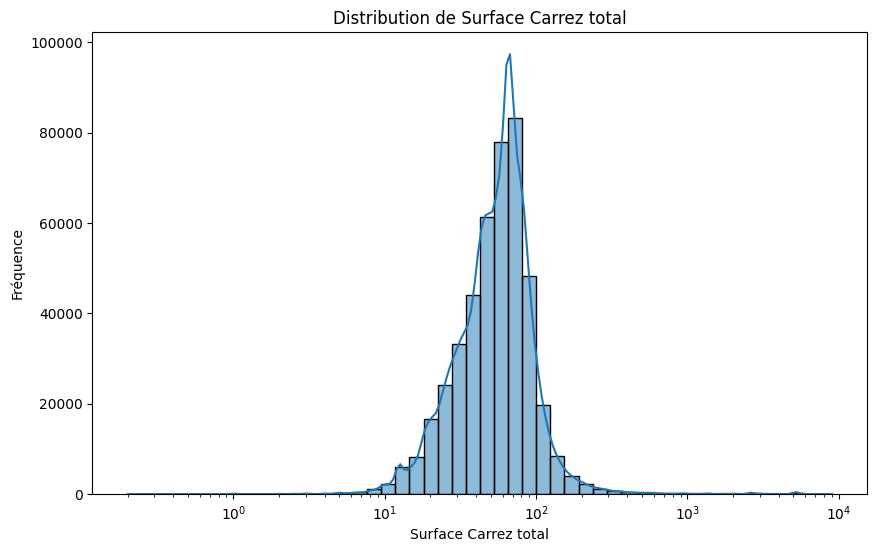

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supprimer les lignes avec des NaN dans les colonnes numériques
df_cleaned = df.dropna(subset = ['Surface Carrez total'])
# Filtrer les valeurs supérieures à zéro
df_positive = df_cleaned[df_cleaned['Surface Carrez total'] > 0]
# Distribution de Surface Carrez total
plt.figure(figsize=(10, 6))
sns.histplot(df_positive['Surface Carrez total'], bins=50, kde=True, log_scale=True)
plt.title(f'Distribution de Surface Carrez total')
plt.xlabel('Surface Carrez total')
plt.ylabel('Fréquence')
plt.show()


#### Histo Valeur foncière

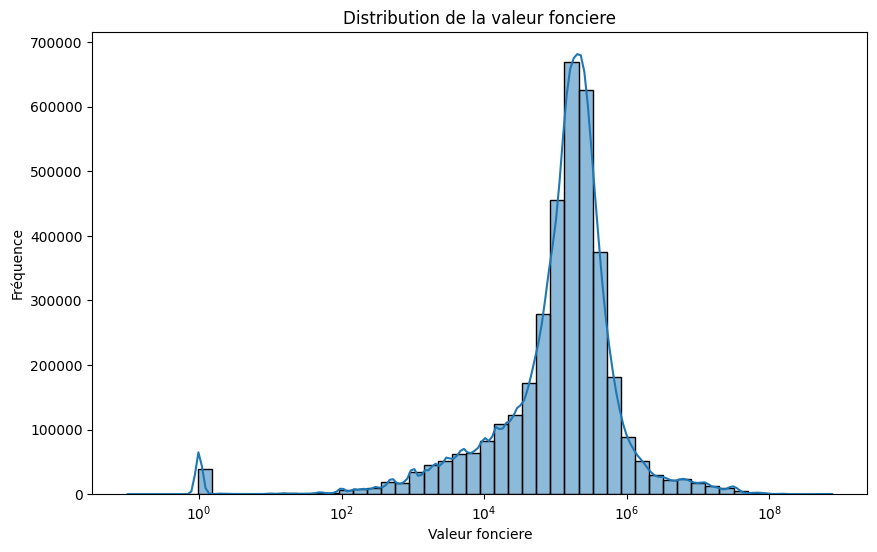

In [148]:
df_cleaned1 = df.dropna(subset = ['Valeur fonciere'])
df_positive1 = df_cleaned1[df_cleaned1['Valeur fonciere'] > 0]

plt.figure(figsize=(10, 6))
sns.histplot(df_positive1['Valeur fonciere'], bins=50, kde=True, log_scale=True)
plt.title(f'Distribution de la valeur fonciere')
plt.xlabel('Valeur fonciere')
plt.ylabel('Fréquence')
plt.show()


#### Histo Surface reelle bati

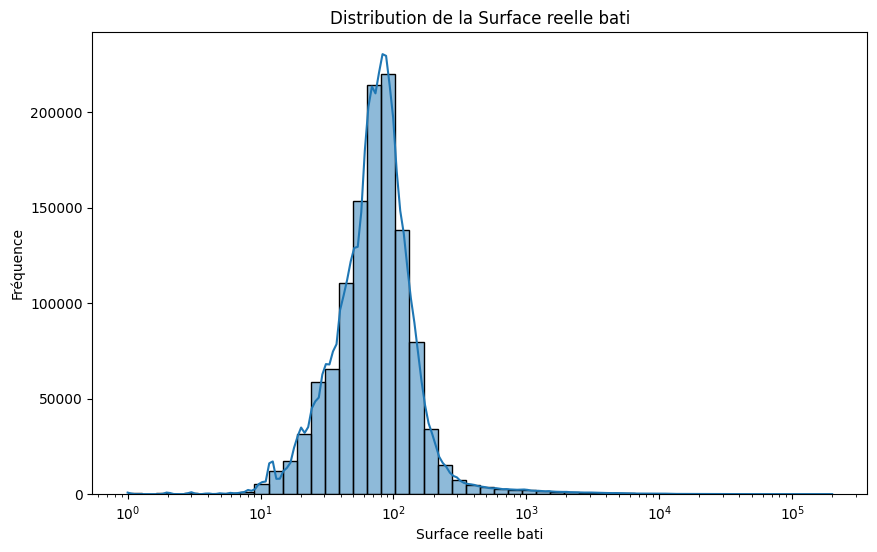

In [149]:
# Supprimer les lignes avec des NaN dans les colonnes numériques
df_cleaned2 = df.dropna(subset = ['Surface reelle bati'])
df_positive2 = df_cleaned2[df_cleaned2['Surface reelle bati'] > 0]

plt.figure(figsize=(10, 6))
sns.histplot(df_positive2['Surface reelle bati'], bins=50, kde=True, log_scale=True)
plt.title(f'Distribution de la Surface reelle bati')
plt.xlabel('Surface reelle bati')
plt.ylabel('Fréquence')
plt.show()

### Histo Prix m²

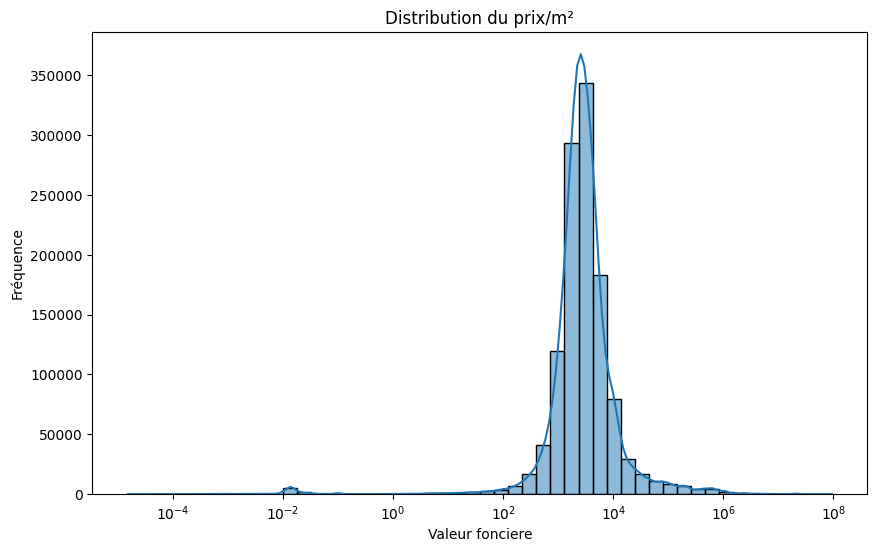

In [150]:
df_cleaned3 = df.dropna(subset = ['Prix_m2'])
df_positive3 = df_cleaned3[df_cleaned3['Prix_m2'] > 0]

plt.figure(figsize=(10, 6))
sns.histplot(df_positive3['Prix_m2'], bins=50, kde=True, log_scale=True)
plt.title(f'Distribution du prix/m²')
plt.xlabel('Valeur fonciere')
plt.ylabel('Fréquence')
plt.show()

#### Histo surface terrain

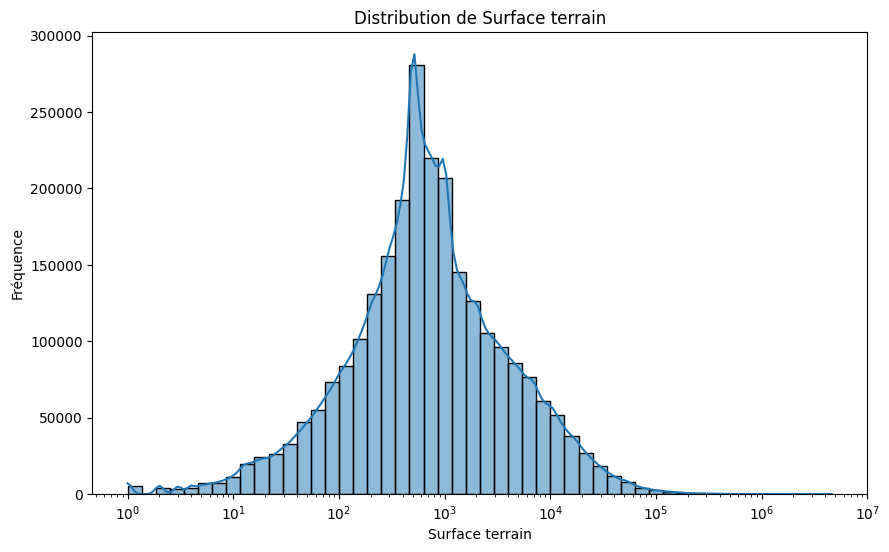

In [151]:
df_cleaned4 = df.dropna(subset = ['Surface terrain'])
df_positive4 = df_cleaned4[df_cleaned4['Surface terrain'] > 0]

plt.figure(figsize=(10, 6))
sns.histplot(df_positive4['Surface terrain'], bins=50, kde=True, log_scale=True)
plt.title(f'Distribution de Surface terrain')
plt.xlabel('Surface terrain')
plt.ylabel('Fréquence')
plt.show()

#### Histo Nombre de pieces principales

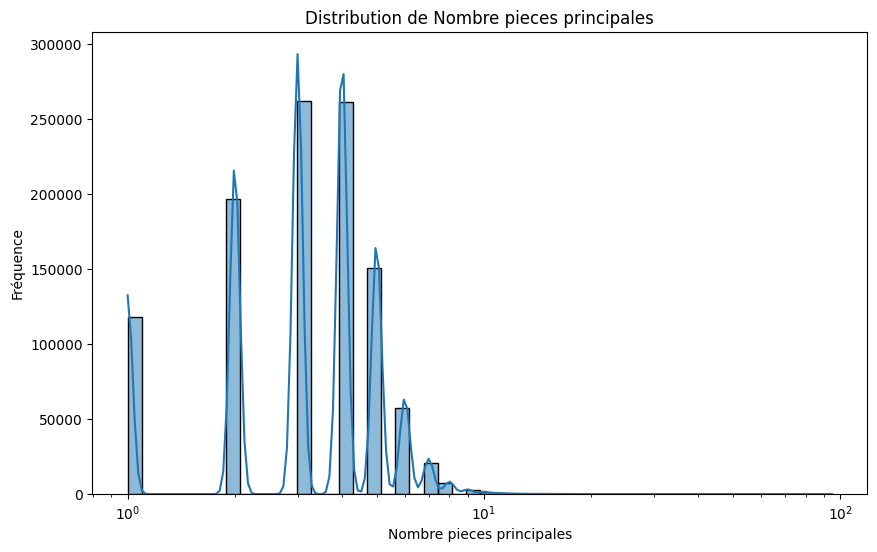

In [152]:
df_cleaned5 = df.dropna(subset = ['Nombre pieces principales'])
df_positive5 = df_cleaned5[df_cleaned5['Nombre pieces principales'] > 0]

plt.figure(figsize=(10, 6))
sns.histplot(df_positive5['Nombre pieces principales'], bins=50, kde=True, log_scale=True)
plt.title(f'Distribution de Nombre pieces principales')
plt.xlabel('Nombre pieces principales')
plt.ylabel('Fréquence')
plt.show()

### Histo pour les variables catégorielles

#### Histo Date mutation

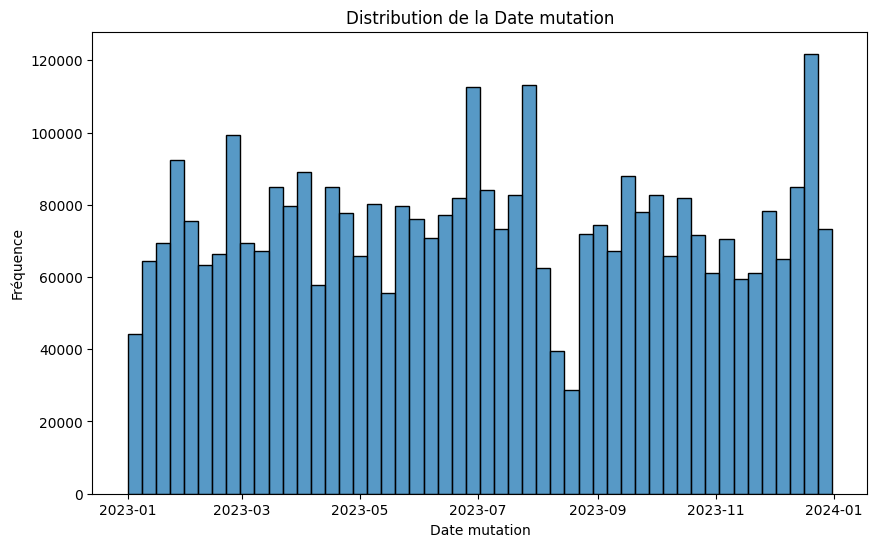

In [153]:
#faut faire la conversion à chaque fois pour les variables catégorielles
df['Date mutation'] = pd.to_datetime(df['Date mutation'], format="%d/%m/%Y")

plt.figure(figsize=(10, 6))
sns.histplot(df['Date mutation'], bins=50, kde=False)
plt.title('Distribution de la Date mutation')
plt.xlabel('Date mutation')
plt.ylabel('Fréquence')
plt.show()

#### Hist Nature mutation

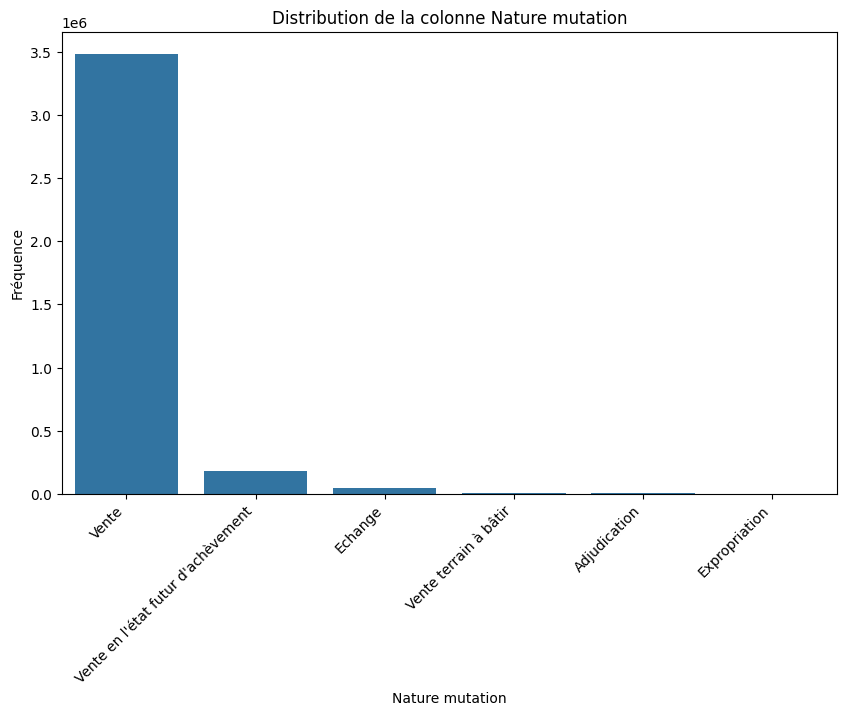

In [154]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Nature mutation', order=df['Nature mutation'].value_counts().index)
plt.title('Distribution de la colonne Nature mutation')
plt.xlabel('Nature mutation')
plt.ylabel('Fréquence')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Hist code département ile-de-france + normandie

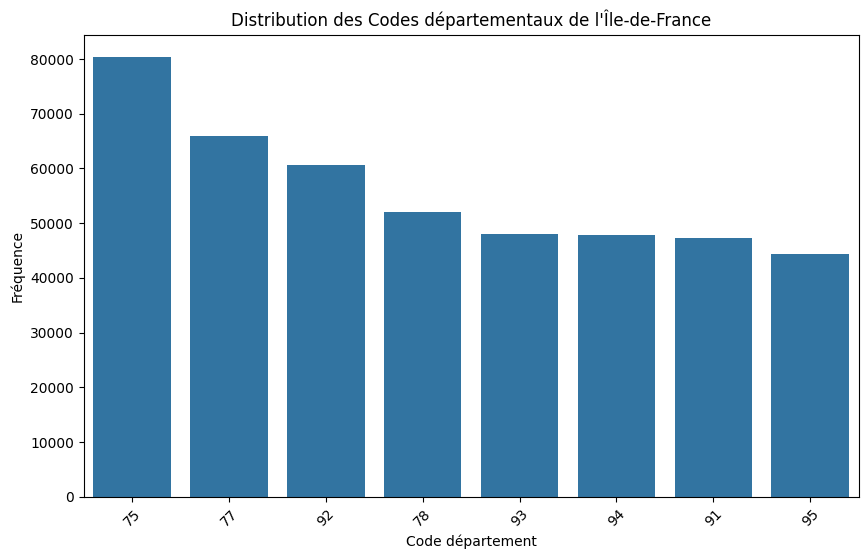

In [155]:
# Ile-de-France
df_idf = df[df['Code departement'].isin(['75', '77', '78', '91', '92', '93', '94', '95'])]

plt.figure(figsize=(10, 6))
sns.countplot(data=df_idf, x='Code departement', order=df_idf['Code departement'].value_counts().index)
plt.title('Distribution des Codes départementaux de l\'Île-de-France')
plt.xlabel('Code département')
plt.ylabel('Fréquence')
plt.xticks(rotation=45)
plt.show()



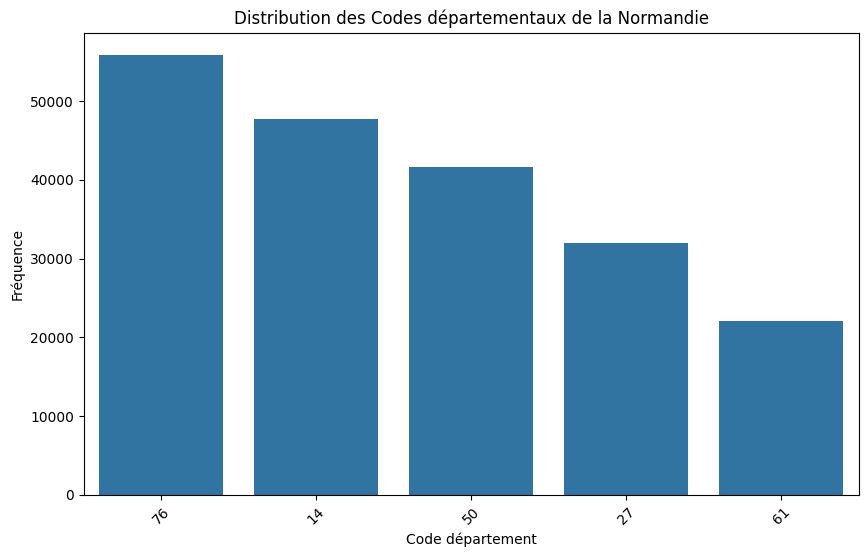

In [156]:
#Normandie
df_normandie = df[df['Code departement'].isin(['14', '27', '50', '61', '76'])]

# Afficher la distribution des codes départementaux de la Normandie
plt.figure(figsize=(10, 6))
sns.countplot(data=df_normandie, x='Code departement', order=df_normandie['Code departement'].value_counts().index)
plt.title('Distribution des Codes départementaux de la Normandie')
plt.xlabel('Code département')
plt.ylabel('Fréquence')
plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
plt.show()

#### Hist type local

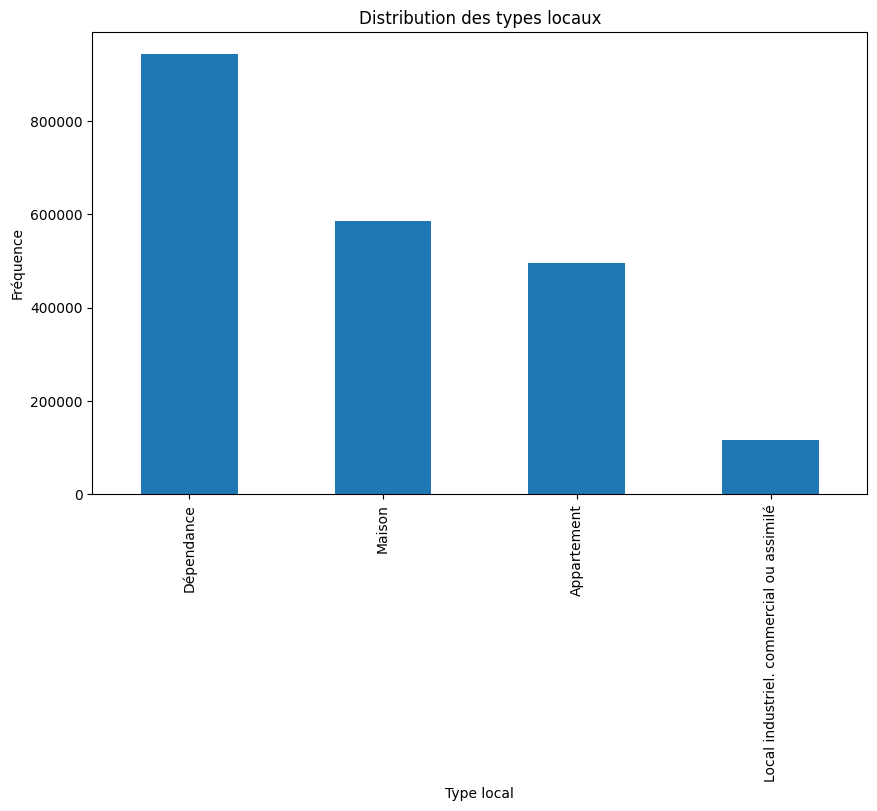

In [ ]:
type_counts = df['Type local'].value_counts()

plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar')
plt.title('Distribution des types locaux')
plt.xlabel('Type local')
plt.ylabel('Fréquence')
plt.show()

#### Hist adresse

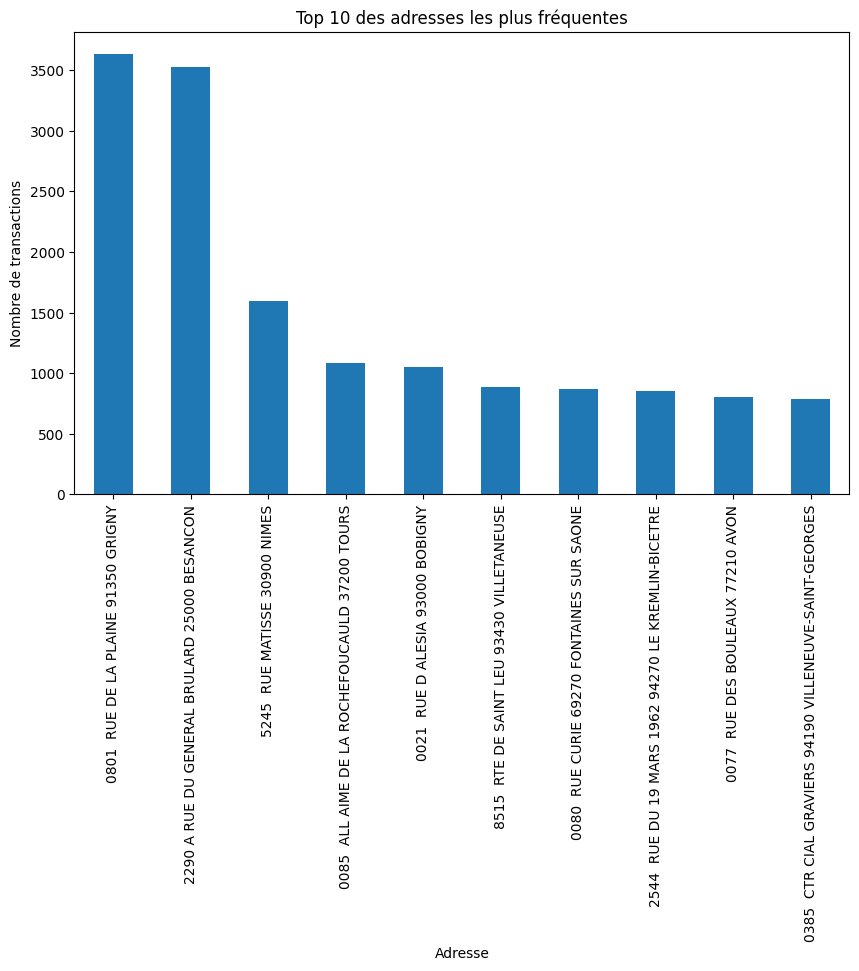

In [ ]:
# Compter le nombre de transactions pour chaque adresse
adresse_counts = df['Adresse'].value_counts()

#Top 10 des + fréquents 
top_10_adresses = adresse_counts.head(10)

plt.figure(figsize=(10, 6))
top_10_adresses.plot(kind='bar')
plt.title('Top 10 des adresses les plus fréquentes')
plt.xlabel('Adresse')
plt.ylabel('Nombre de transactions')
plt.show()


## Interprétation des variables catégorielles avec les valeurs foncieres

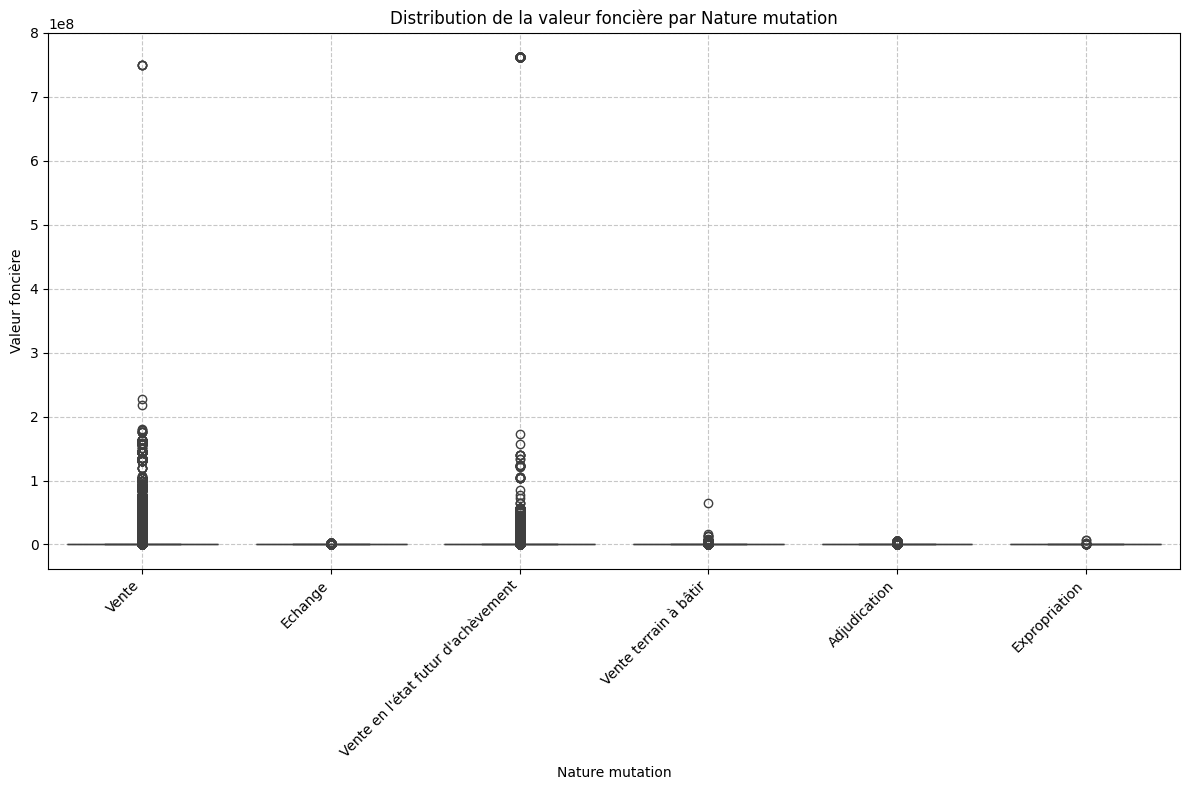

In [ ]:
# Diagramme en boîte de la valeur foncière pour différentes catégories de Nature mutation
#plt.figure(figsize=(12, 8))
#sns.boxplot(data=df, x='Nature mutation', y='Valeur fonciere')
#plt.title('Distribution de la valeur foncière par Nature mutation')
#plt.xlabel('Nature mutation')
#plt.ylabel('Valeur foncière')
#plt.xticks(rotation=45)
#plt.show()

# Avec la grille pour mieux visualiser sinon pas top 
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Nature mutation', y='Valeur fonciere')
plt.title('Distribution de la valeur foncière par Nature mutation')
plt.xlabel('Nature mutation')
plt.ylabel('Valeur foncière')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

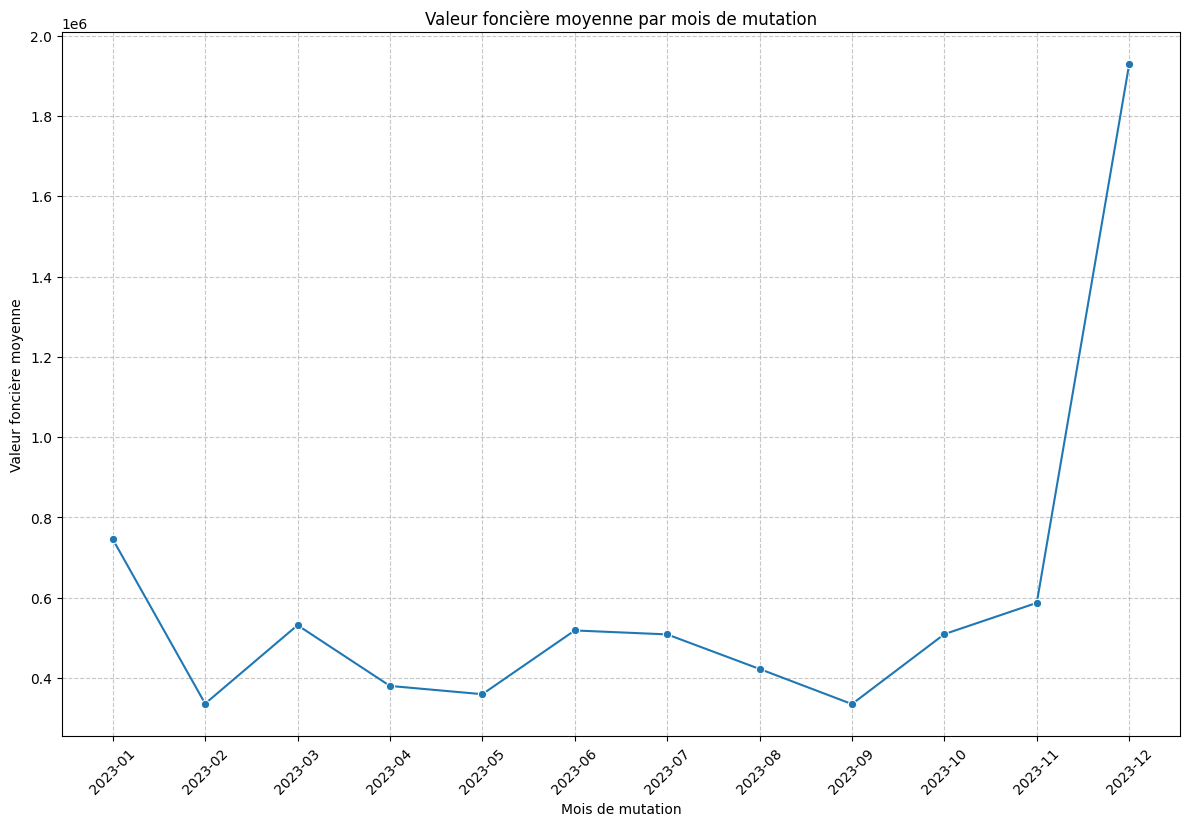

In [ ]:
# Convertir 'date mutation' en datetime obligé de faire la conversion sinon ca ne marche pas 
#df['Date mutation'] = pd.to_datetime(df['Date mutation'], format='%d/%m/%Y')

# Graphique de dispersion de la valeur foncière en fonction de la date mutation
#plt.figure(figsize=(12, 8))
#sns.scatterplot(data=df, x='Date mutation', y='Valeur fonciere', alpha=0.5)
#plt.title('Valeur foncière en fonction de la date de mutation')
#plt.xlabel('Date de mutation')
#plt.ylabel('Valeur foncière')
#plt.grid(True, linestyle='--', alpha=0.7)  
#plt.tight_layout()
#plt.show()


#faut convertir sinon ca marche pas
df['Date mutation'] = pd.to_datetime(df['Date mutation'], format='%d/%m/%Y')

df['Mois mutation'] = df['Date mutation'].dt.to_period('M').astype(str)

# Calculer la moyenne de la valeur foncière par mois
df_monthly = df.groupby('Mois mutation')['Valeur fonciere'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=df_monthly, x='Mois mutation', y='Valeur fonciere', marker='o')
plt.title('Valeur foncière moyenne par mois de mutation')
plt.xlabel('Mois de mutation')
plt.ylabel('Valeur foncière moyenne')
plt.grid(True, linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


C:\Users\Julie Mahot\AppData\Local\Temp\ipykernel_13596\793447843.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_value_by_department_sorted, x='Code departement', y='Valeur fonciere', palette='viridis')


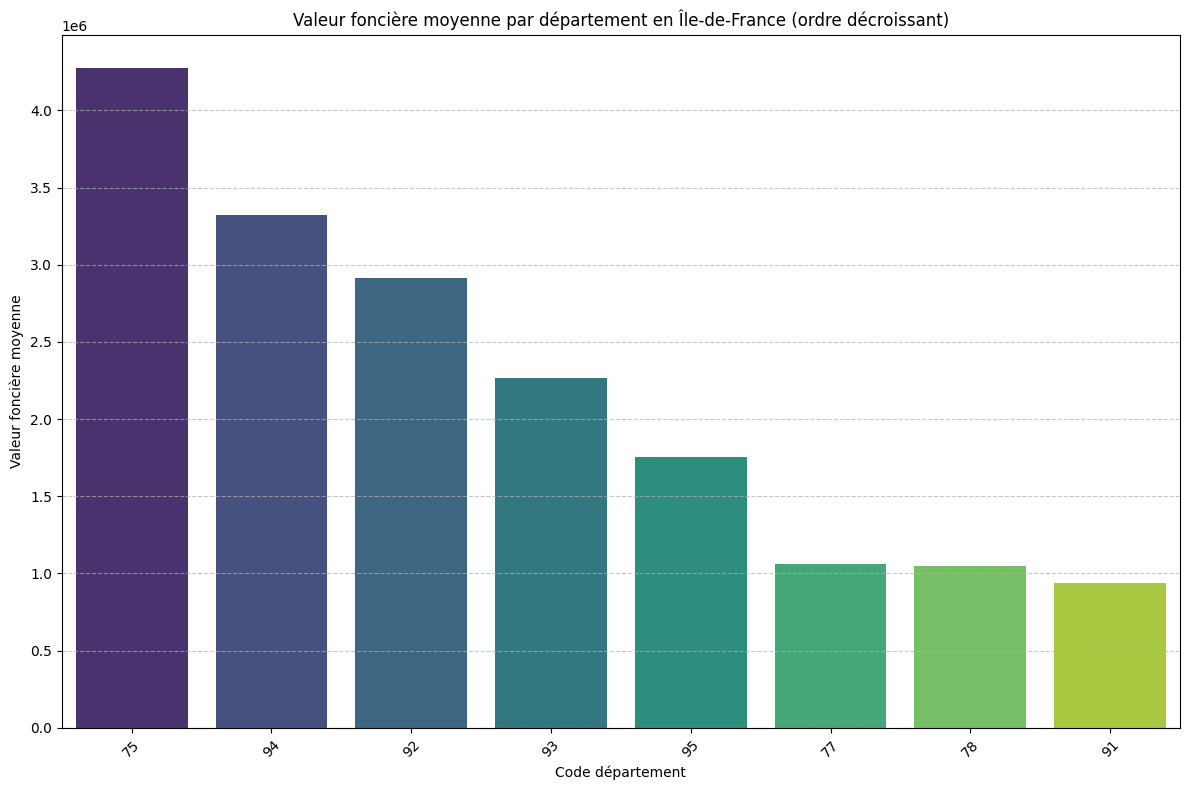

In [ ]:
#Ile-de-France
ile_de_france_departments = ['75', '77', '78', '91', '92', '93', '94', '95']
df_ile_de_france = df[df['Code departement'].isin(ile_de_france_departments)]

mean_value_by_department = df_ile_de_france.groupby('Code departement')['Valeur fonciere'].mean().reset_index()

#On va trier dans l'ordre décroissant pour avoir une belle visualisation 
mean_value_by_department_sorted = mean_value_by_department.sort_values(by='Valeur fonciere', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=mean_value_by_department_sorted, x='Code departement', y='Valeur fonciere', palette='viridis')
plt.title('Valeur foncière moyenne par département en Île-de-France (ordre décroissant)')
plt.xlabel('Code département')
plt.ylabel('Valeur foncière moyenne')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\Julie Mahot\AppData\Local\Temp\ipykernel_13596\3074017056.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_value_by_department_sorted, x='Code departement', y='Valeur fonciere', palette='viridis')


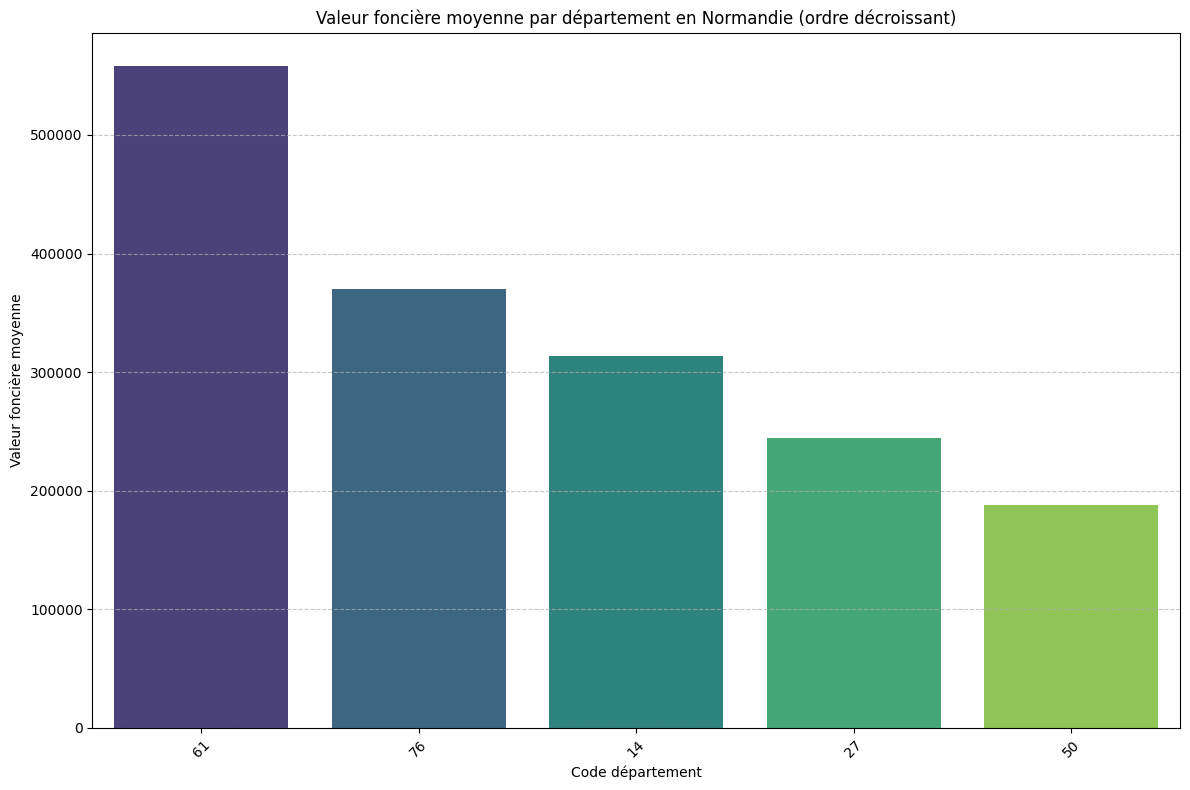

In [ ]:
#Normandie 
normandie_departments = ['14', '27', '50', '61', '76']
df_normandie = df[df['Code departement'].isin(normandie_departments)]

mean_value_by_department = df_normandie.groupby('Code departement')['Valeur fonciere'].mean().reset_index()
mean_value_by_department_sorted = mean_value_by_department.sort_values(by='Valeur fonciere', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=mean_value_by_department_sorted, x='Code departement', y='Valeur fonciere', palette='viridis')
plt.title('Valeur foncière moyenne par département en Normandie (ordre décroissant)')
plt.xlabel('Code département')
plt.ylabel('Valeur foncière moyenne')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

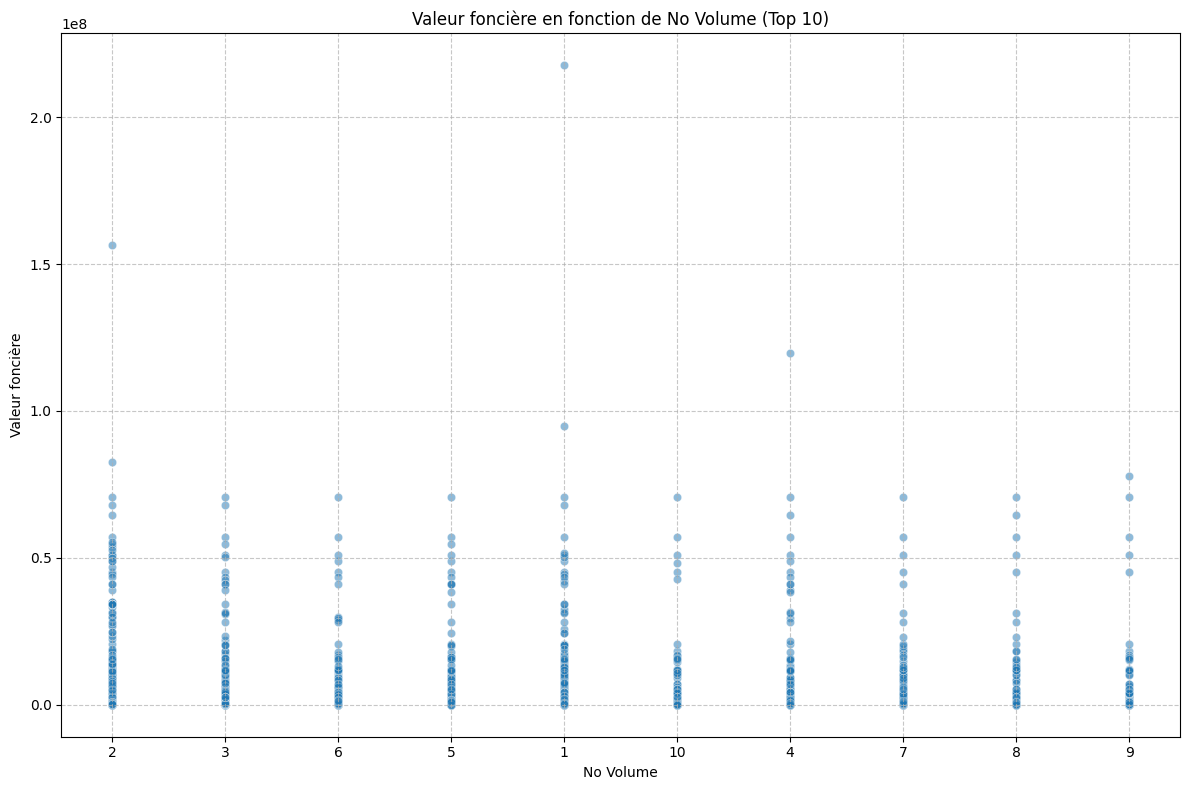

In [ ]:

# Graphique de dispersion de la valeur foncière pour les catégories les plus fréquentes de No Volume
# Sélectionner les catégories les plus fréquentes de No Volume (par exemple, les 10 premières)
top_no_volume_categories = df['No Volume'].value_counts().head(10).index
df_top_no_volume = df[df['No Volume'].isin(top_no_volume_categories)]

# Graphique de dispersion de la valeur foncière pour les catégories les plus fréquentes de No Volume
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_top_no_volume, x='No Volume', y='Valeur fonciere', alpha=0.5)
plt.title('Valeur foncière en fonction de No Volume (Top 10)')
plt.xlabel('No Volume')
plt.ylabel('Valeur foncière')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\Julie Mahot\AppData\Local\Temp\ipykernel_13596\1808193870.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_value_by_type_local, x='Type local', y='Valeur fonciere', palette='viridis')


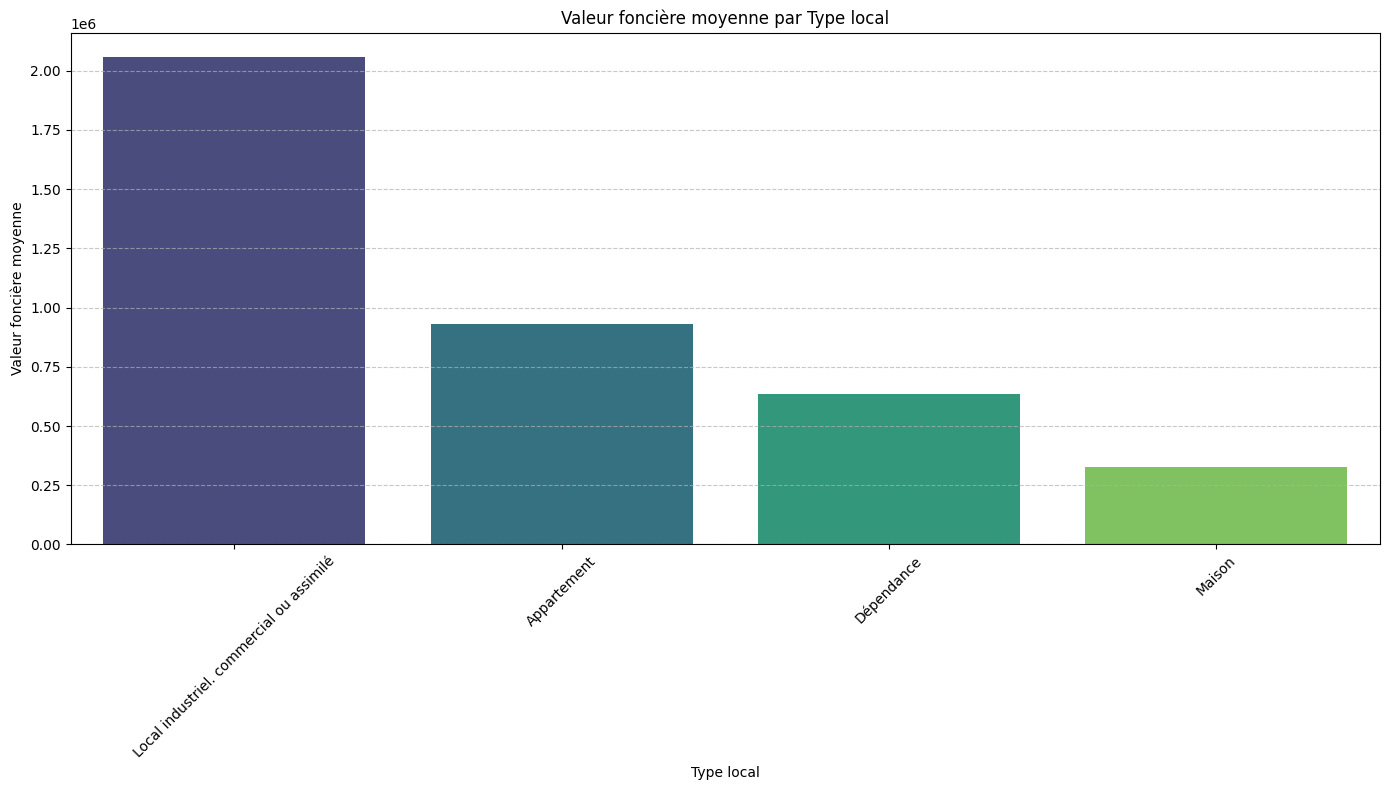

In [ ]:
mean_value_by_type_local = df.groupby('Type local')['Valeur fonciere'].mean().reset_index()
mean_value_by_type_local = mean_value_by_type_local.sort_values(by='Valeur fonciere', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(data=mean_value_by_type_local, x='Type local', y='Valeur fonciere', palette='viridis')
plt.title('Valeur foncière moyenne par Type local')
plt.xlabel('Type local')
plt.ylabel('Valeur foncière moyenne')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\Julie Mahot\AppData\Local\Temp\ipykernel_13596\3245341755.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_addresses, x='Adresse', y='Valeur fonciere', palette='viridis')


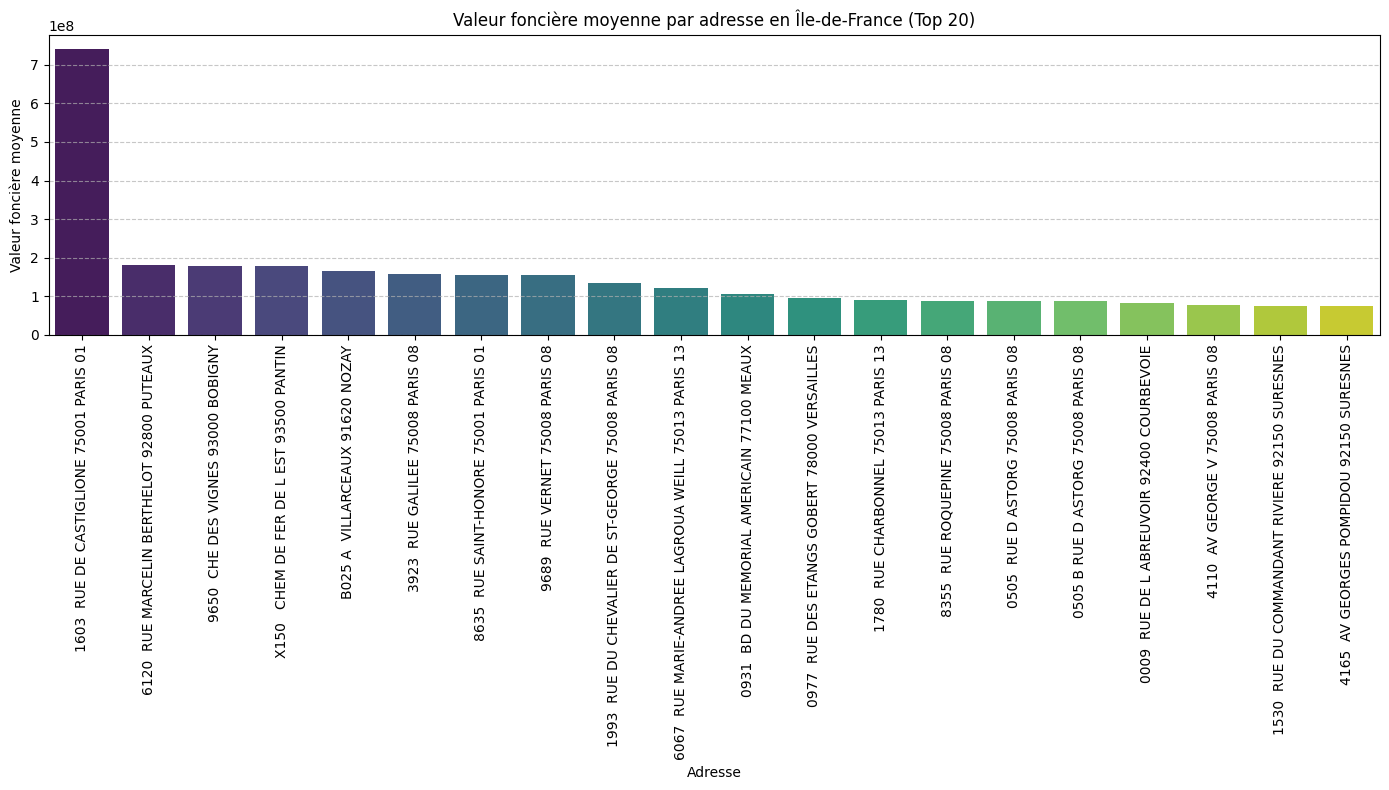

In [ ]:
#Ile-de-France 
ile_de_france_departments = ['75', '77', '78', '91', '92', '93', '94', '95']
df_ile_de_france = df[df['Code departement'].isin(ile_de_france_departments)]
mean_value_by_address = df_ile_de_france.groupby('Adresse')['Valeur fonciere'].mean().reset_index()
mean_value_by_address = mean_value_by_address.sort_values(by='Valeur fonciere', ascending=False)
# top 20
top_20_addresses = mean_value_by_address.head(20)

plt.figure(figsize=(14, 8))
sns.barplot(data=top_20_addresses, x='Adresse', y='Valeur fonciere', palette='viridis')
plt.title('Valeur foncière moyenne par adresse en Île-de-France (Top 20)')
plt.xlabel('Adresse')
plt.ylabel('Valeur foncière moyenne')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Corrélation

In [ ]:
#On prend les variables numériques 

#calcul de la corrélation
corr_matrix = df[['Valeur fonciere', 'Nombre de lots', 'Surface reelle bati', 'Nombre pieces principales', 'Surface terrain', 'Surface Carrez total']].corr()
print(corr_matrix)

                           Valeur fonciere  Nombre de lots  \
Valeur fonciere                   1.000000       -0.002011   
Nombre de lots                   -0.002011        1.000000   
Surface reelle bati               0.027973       -0.028532   
Nombre pieces principales        -0.015249       -0.195208   
Surface terrain                   0.029266       -0.008341   
Surface Carrez total              0.032751        0.214854   

                           Surface reelle bati  Nombre pieces principales  \
Valeur fonciere                       0.027973                  -0.015249   
Nombre de lots                       -0.028532                  -0.195208   
Surface reelle bati                   1.000000                   0.053088   
Nombre pieces principales             0.053088                   1.000000   
Surface terrain                       0.074788                  -0.031640   
Surface Carrez total                  0.002753                  -0.008297   

                         

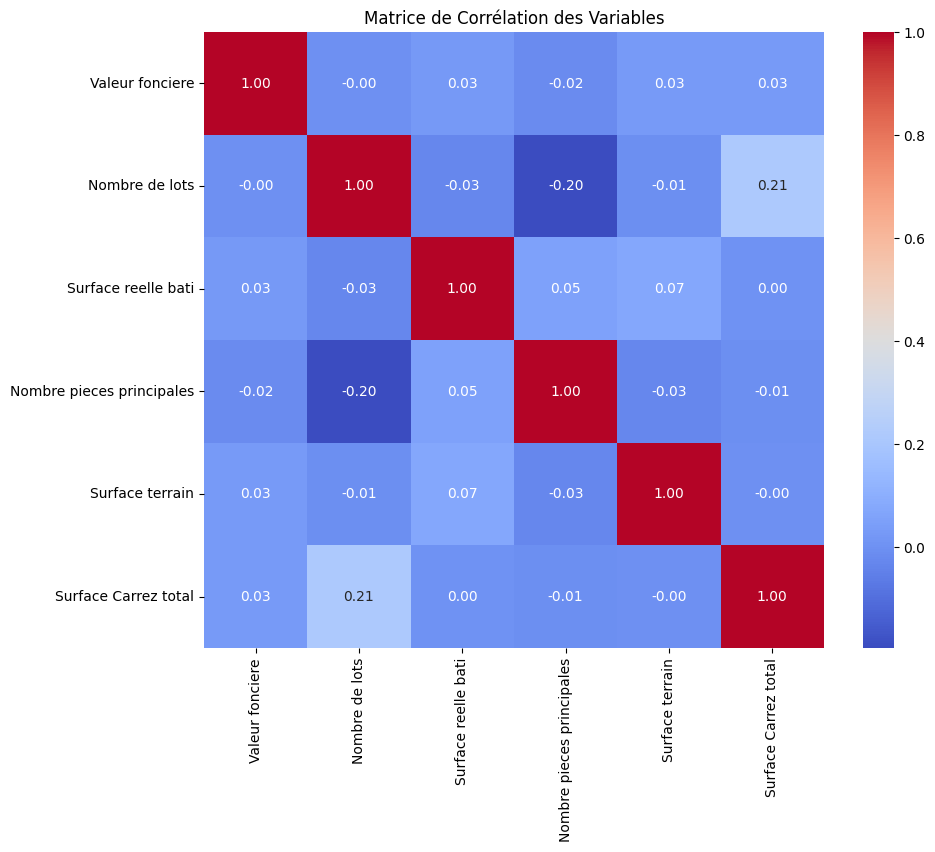

In [ ]:
#Matrice 
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Matrice de Corrélation des Variables')
plt.show()

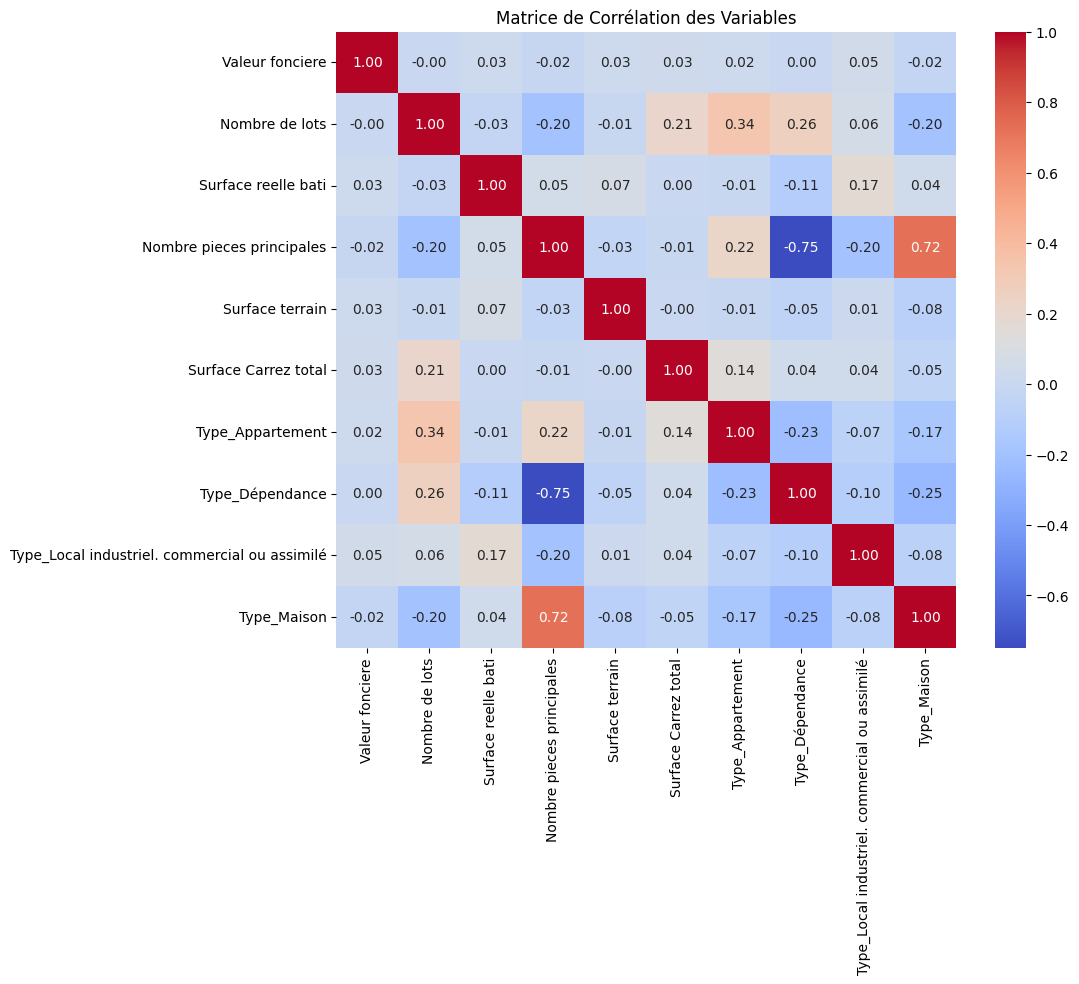

In [ ]:
# Matrice de correlation avec les types de local
 
one_hot_encoded = pd.get_dummies(df['Type local'], prefix='Type')
df_encoded = pd.concat([df, one_hot_encoded], axis=1)
numerical_columns = ['Valeur fonciere', 'Nombre de lots', 'Surface reelle bati', 'Nombre pieces principales', 'Surface terrain', 'Surface Carrez total']
columns_to_correlate = numerical_columns + list(one_hot_encoded.columns)
corr_matrix = df_encoded[columns_to_correlate].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Matrice de Corrélation des Variables')
plt.show()

###### correlation par type de logement

                           Valeur fonciere  Nombre de lots  \
Valeur fonciere                   1.000000       -0.072969   
Nombre de lots                   -0.072969        1.000000   
Surface reelle bati              -0.000172        0.000206   
Nombre pieces principales              NaN             NaN   
Surface terrain                   0.108820       -0.005358   
Surface Carrez total              0.065925        0.190726   
Type_Dépendance                        NaN             NaN   

                           Surface reelle bati  Nombre pieces principales  \
Valeur fonciere                      -0.000172                        NaN   
Nombre de lots                        0.000206                        NaN   
Surface reelle bati                   1.000000                        NaN   
Nombre pieces principales                  NaN                        NaN   
Surface terrain                            NaN                        NaN   
Surface Carrez total                 -0.0

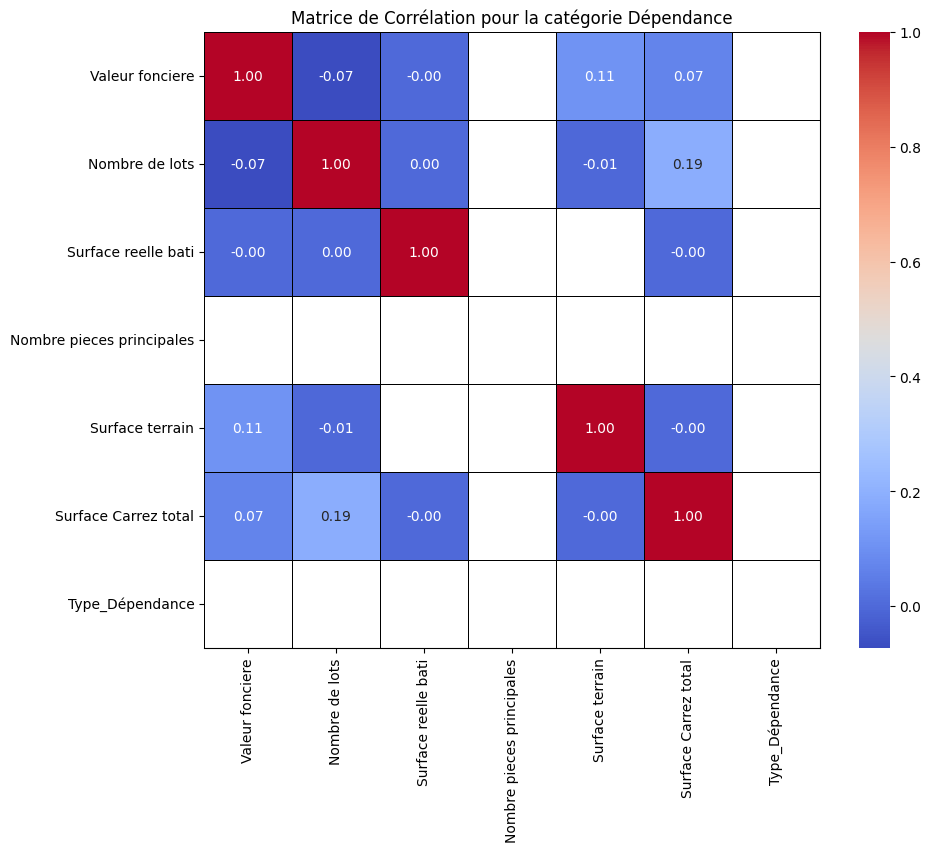

                           Valeur fonciere  Nombre de lots  \
Valeur fonciere                   1.000000       -0.115327   
Nombre de lots                   -0.115327        1.000000   
Surface reelle bati               0.029296        0.128460   
Nombre pieces principales         0.033830        0.126546   
Surface terrain                   0.061455       -0.012485   
Surface Carrez total              0.032728        0.156465   
Type_Appartement                       NaN             NaN   

                           Surface reelle bati  Nombre pieces principales  \
Valeur fonciere                       0.029296                   0.033830   
Nombre de lots                        0.128460                   0.126546   
Surface reelle bati                   1.000000                   0.818823   
Nombre pieces principales             0.818823                   1.000000   
Surface terrain                       0.041875                   0.062520   
Surface Carrez total                  0.1

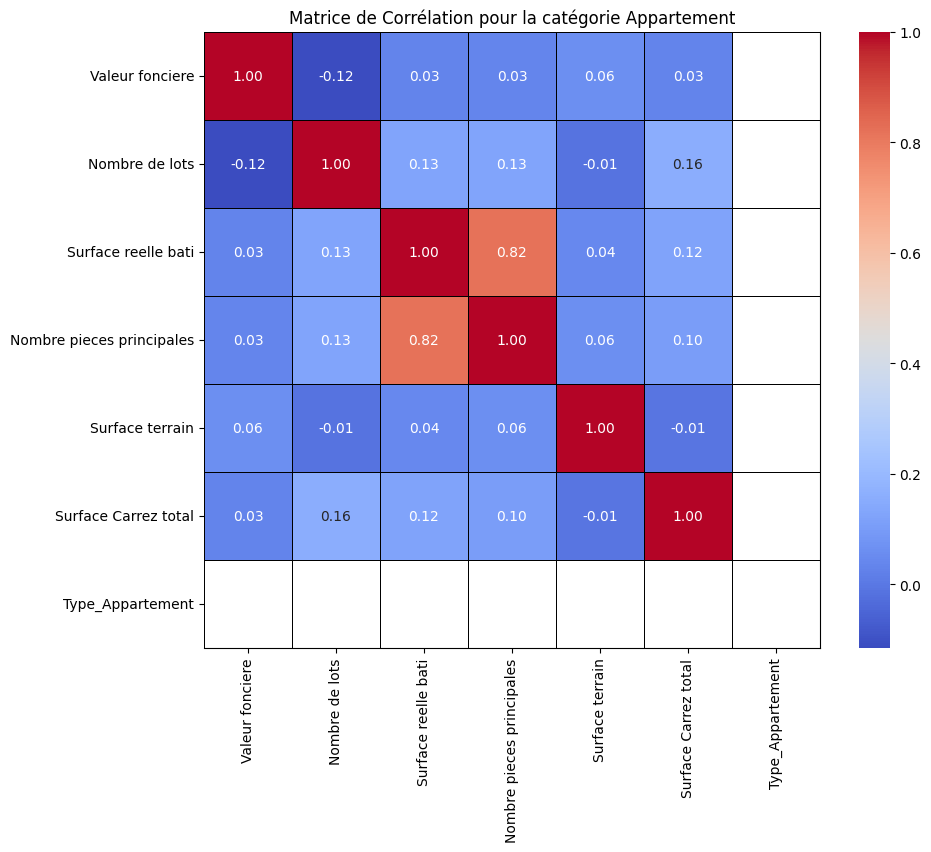

                           Valeur fonciere  Nombre de lots  \
Valeur fonciere                   1.000000       -0.000707   
Nombre de lots                   -0.000707        1.000000   
Surface reelle bati               0.123023       -0.055834   
Nombre pieces principales         0.068275       -0.034230   
Surface terrain                   0.088289       -0.004109   
Surface Carrez total              0.004776        0.327048   
Type_Maison                            NaN             NaN   

                           Surface reelle bati  Nombre pieces principales  \
Valeur fonciere                       0.123023                   0.068275   
Nombre de lots                       -0.055834                  -0.034230   
Surface reelle bati                   1.000000                   0.715906   
Nombre pieces principales             0.715906                   1.000000   
Surface terrain                       0.047708                   0.012458   
Surface Carrez total                 -0.0

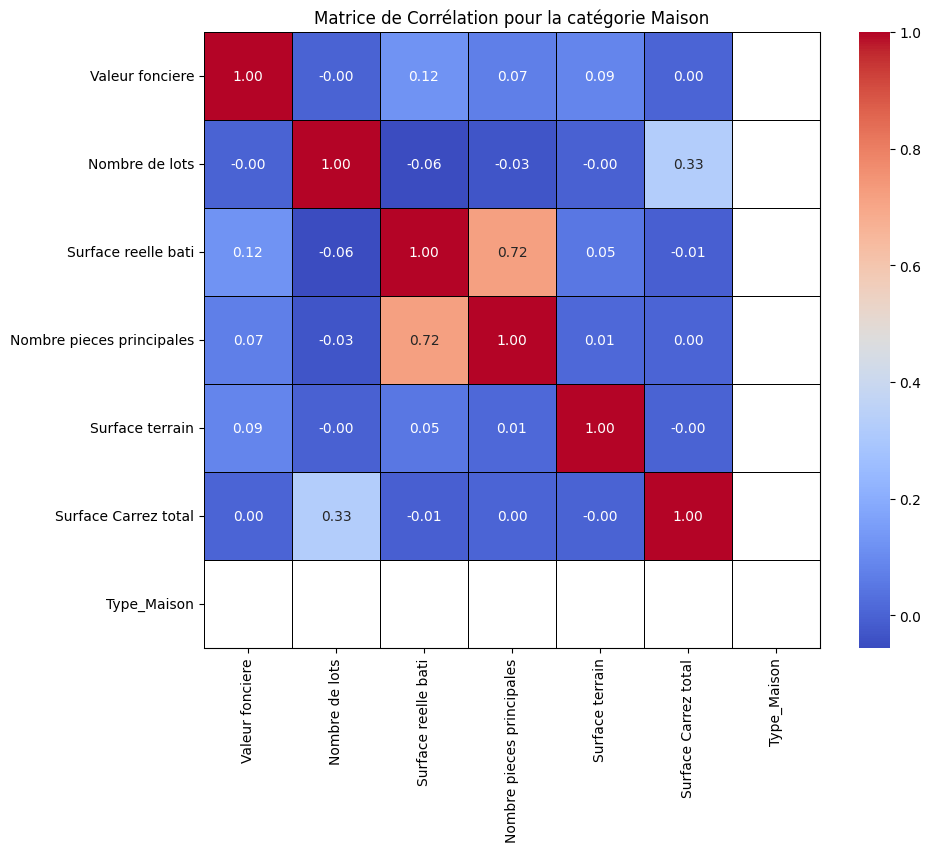

                           Valeur fonciere  Nombre de lots  \
Valeur fonciere                        NaN             NaN   
Nombre de lots                         NaN             NaN   
Surface reelle bati                    NaN             NaN   
Nombre pieces principales              NaN             NaN   
Surface terrain                        NaN             NaN   
Surface Carrez total                   NaN             NaN   

                           Surface reelle bati  Nombre pieces principales  \
Valeur fonciere                            NaN                        NaN   
Nombre de lots                             NaN                        NaN   
Surface reelle bati                        NaN                        NaN   
Nombre pieces principales                  NaN                        NaN   
Surface terrain                            NaN                        NaN   
Surface Carrez total                       NaN                        NaN   

                         

c:\Users\Julie Mahot\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\Julie Mahot\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


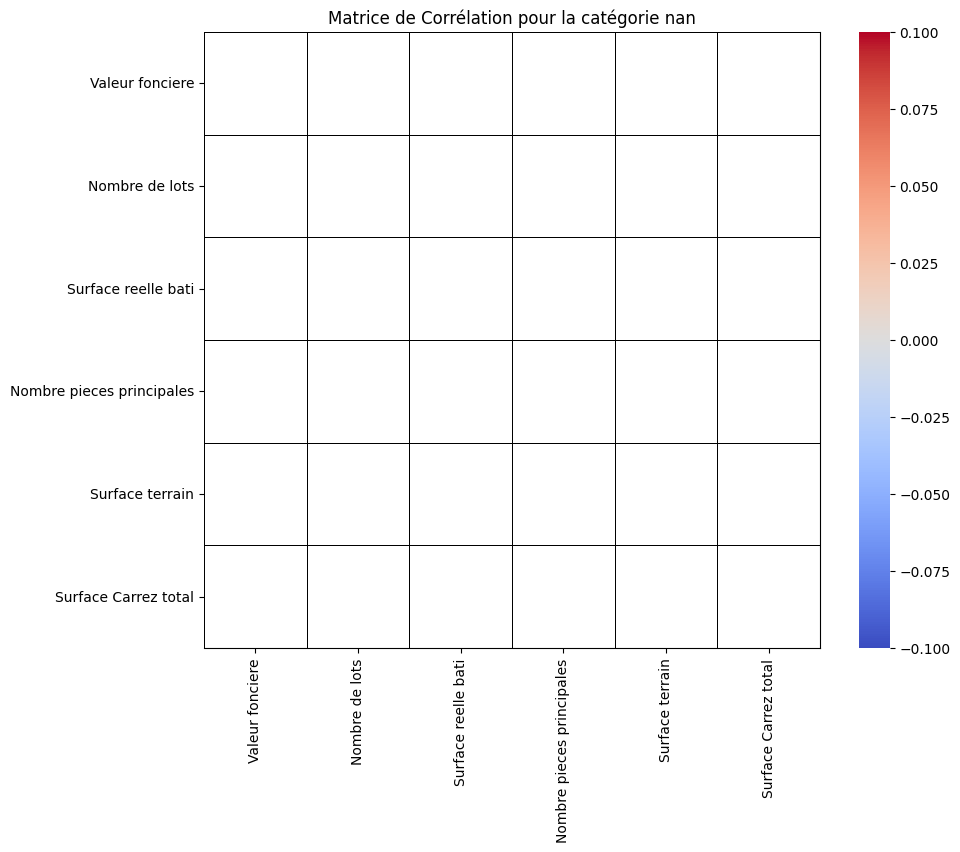

                                               Valeur fonciere  \
Valeur fonciere                                       1.000000   
Nombre de lots                                       -0.003971   
Surface reelle bati                                   0.028372   
Nombre pieces principales                                  NaN   
Surface terrain                                       0.053425   
Surface Carrez total                                 -0.003583   
Type_Local industriel. commercial ou assimilé              NaN   

                                               Nombre de lots  \
Valeur fonciere                                     -0.003971   
Nombre de lots                                       1.000000   
Surface reelle bati                                 -0.022890   
Nombre pieces principales                                 NaN   
Surface terrain                                     -0.005636   
Surface Carrez total                                 0.101910   
Type_Local indus

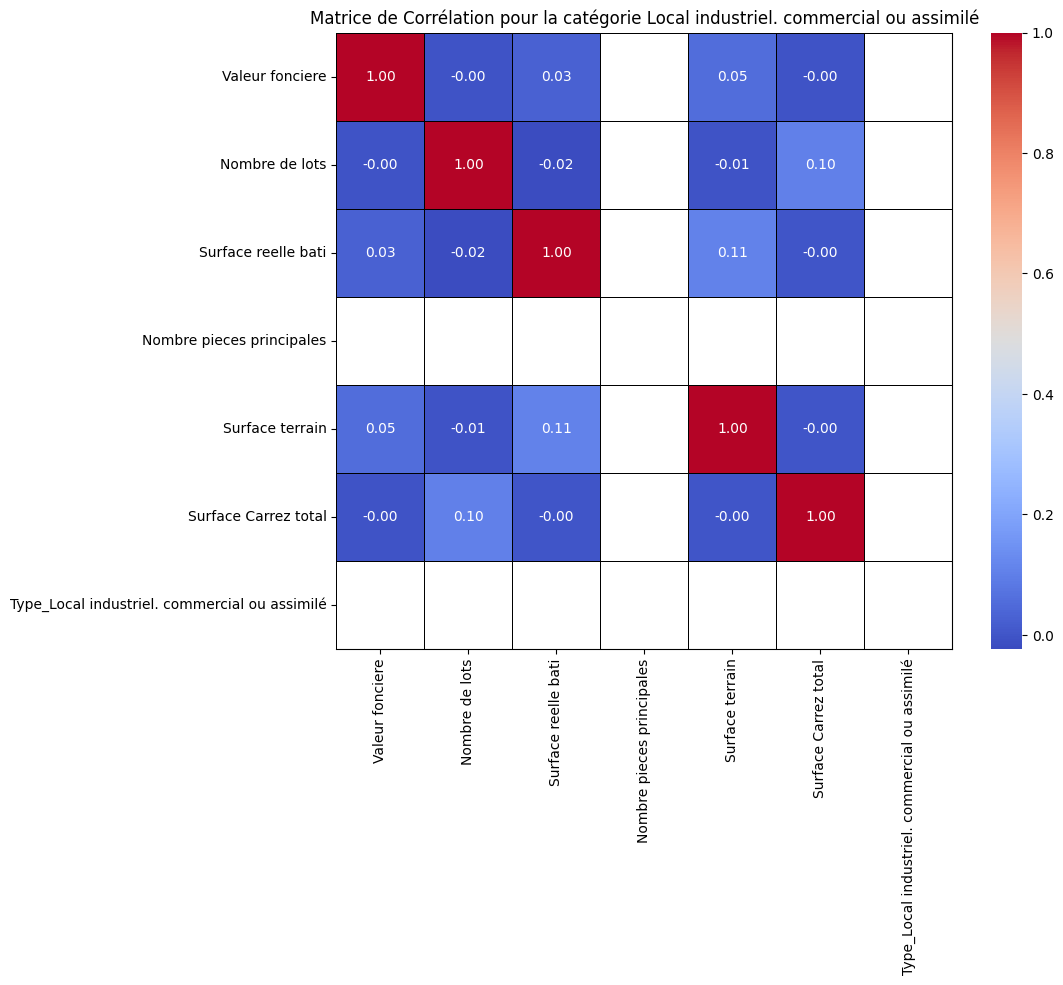

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Date mutation'] = pd.to_datetime(df['Date mutation'], format='%d/%m/%Y')
df['Mois'] = df['Date mutation'].dt.month
type_local_categories = df['Type local'].unique()

for category in type_local_categories:
    df_category = df[df['Type local'] == category]
    one_hot_encoded = pd.get_dummies(df_category['Type local'], prefix='Type')
    df_encoded = pd.concat([df_category, one_hot_encoded], axis=1)
    
    numerical_columns = ['Valeur fonciere', 'Nombre de lots', 'Surface reelle bati', 'Nombre pieces principales', 'Surface terrain', 'Surface Carrez total']
    
    columns_to_correlate = numerical_columns + list(one_hot_encoded.columns)
    
    corr_matrix = df_encoded[columns_to_correlate].corr()
    
    print(corr_matrix)

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, linewidths=0.5, linecolor='black', square=True)
    plt.title(f'Matrice de Corrélation pour la catégorie {category}')
    #plt.grid(True, linestyle='--', linewidth=1, alpha=1)
    plt.xticks()
    plt.yticks()
    plt.gca().spines['right'].set_visible(True)
    plt.gca().spines['bottom'].set_visible(True)
    plt.show()

## Valeur foncière Moyenne en fonction du type de bien

#### Types de local selon la dataframe

##### avec df valeur foncière non groupée

dans la dataframe 'df', les valeurs foncières n'ont pas été group by lorsqu'une vente est composée de plusieurs type de bien

In [ ]:
df['Type local'].unique()

array(['Dépendance', 'Appartement', 'Maison', nan,
       'Local industriel. commercial ou assimilé'], dtype=object)

In [ ]:
df_appart=df[df['Type local']=='Appartement']
df_dep2=df[df['Type local']=='Maison']
df_dependance=df[df['Type local']=='Dépendance']
df_localindust=df[df['Type local']=='Local industriel. commercial ou assimilé']
mean_appart = df_appart['Valeur fonciere'].mean()
mean_maison = df_maison['Valeur fonciere'].mean()
mean_dependance = df_dependance['Valeur fonciere'].mean()
mean_localindust = df_localindust['Valeur fonciere'].mean()

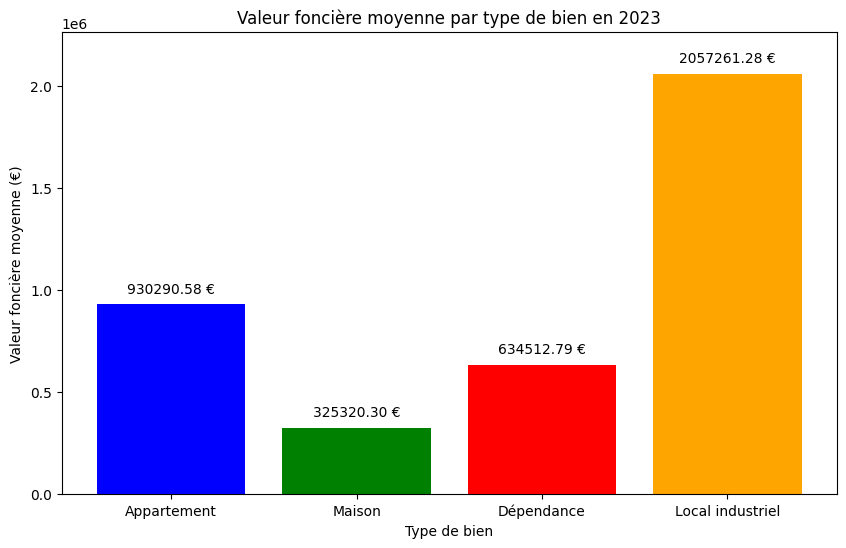

In [ ]:
types_biens = ['Appartement', 'Maison', 'Dépendance', 'Local industriel']
moyennes = [mean_appart, mean_maison, mean_dependance, mean_localindust]

plt.figure(figsize=(10, 6))
plt.bar(types_biens, moyennes, color=['blue', 'green', 'red', 'orange'])

plt.xlabel('Type de bien')
plt.ylabel('Valeur foncière moyenne (€)')
plt.title('Valeur foncière moyenne par type de bien en 2023')
plt.ylim(0, max(moyennes) * 1.1) # pour agrandir l'espace au-dessus de la barre la plus haute

# affichage de la valeur au dessus des barres
for i, v in enumerate(moyennes):
    plt.text(i, v + (max(moyennes) * 0.02), f"{v:.2f} €", ha='center', va='bottom')

plt.show()

##### avec df valeur foncière groupée selon l'adresse et la date de mutation

dans la dataframe 'group_df', les valeurs foncières ont bien été group by et pour chaque vente, il est indiqué les types de biens dont elle est composée

###### calcul des moyennes

In [ ]:
group_df['Type local'].unique()

array(['', 'Maison, Dépendance', 'Maison', 'Appartement, Dépendance',
       'Local industriel. commercial ou assimilé',
       'Maison, Appartement, Dépendance', 'Appartement',
       'Appartement, Local industriel. commercial ou assimilé',
       'Dépendance',
       'Local industriel. commercial ou assimilé, Dépendance',
       'Maison, Local industriel. commercial ou assimilé',
       'Appartement, Local industriel. commercial ou assimilé, Dépendance',
       'Maison, Local industriel. commercial ou assimilé, Dépendance',
       'Maison, Appartement, Local industriel. commercial ou assimilé',
       'Maison, Appartement',
       'Maison, Appartement, Local industriel. commercial ou assimilé, Dépendance'],
      dtype=object)

In [ ]:
df_appart2=group_df[group_df['Type local']=='Appartement']
df_maison2=group_df[group_df['Type local']=='Maison']
df_dependance2=group_df[group_df['Type local']=='Dépendance']
df_localindust2=group_df[group_df['Type local']=='Local industriel. commercial ou assimilé']
mean_appart2 = df_appart2['Valeur fonciere'].mean()
mean_maison2 = df_maison2['Valeur fonciere'].mean()
mean_dependance2 = df_dependance2['Valeur fonciere'].mean()
mean_localindust2 = df_localindust2['Valeur fonciere'].mean()

In [ ]:
df_appart_dep=group_df[group_df['Type local']=='Appartement, Dépendance']
df_maison_dep=group_df[group_df['Type local']=='Maison, Dépendance']
df_localindust_dep=group_df[group_df['Type local']=='Local industriel. commercial ou assimilé, Dépendance']
mean_appart_dep = df_appart_dep['Valeur fonciere'].mean()
mean_maison_dep = df_maison_dep['Valeur fonciere'].mean()
mean_localindust_dep = df_localindust_dep['Valeur fonciere'].mean()

In [ ]:
df_maison_appart_dep=group_df[group_df['Type local']=='Maison, Appartement, Dépendance']
df_maison_appart_localind_dep=group_df[group_df['Type local']=='Maison, Appartement, Local industriel. commercial ou assimilé, Dépendance']
mean_maison_appart_dep = df_maison_appart_dep['Valeur fonciere'].mean()
mean_maison_appart_localind_dep = df_maison_appart_localind_dep['Valeur fonciere'].mean()

###### visualisation

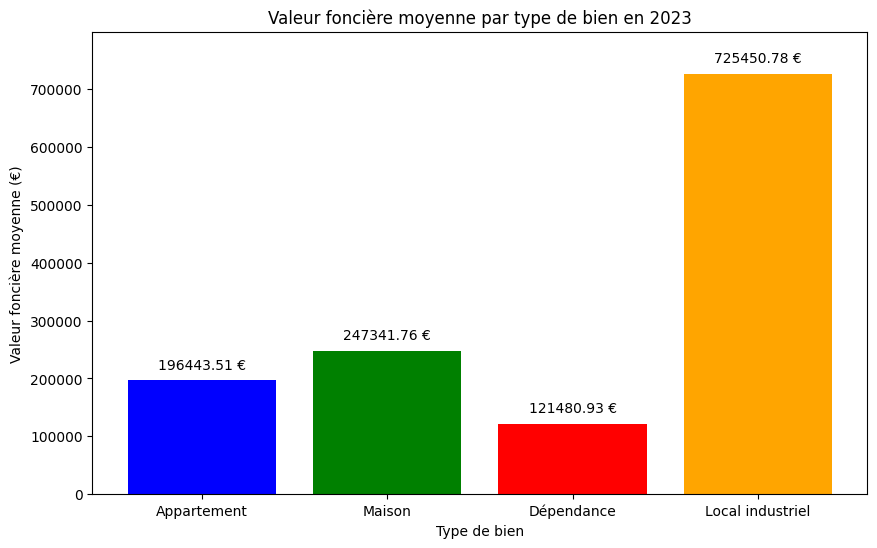

In [ ]:
types_biens = ['Appartement', 'Maison', 'Dépendance', 'Local industriel']
moyennes = [mean_appart2, mean_maison2, mean_dependance2, mean_localindust2]

plt.figure(figsize=(10, 6))
plt.bar(types_biens, moyennes, color=['blue', 'green', 'red', 'orange'])

plt.xlabel('Type de bien')
plt.ylabel('Valeur foncière moyenne (€)')
plt.title('Valeur foncière moyenne par type de bien en 2023')
plt.ylim(0, max(moyennes) * 1.1) # pour agrandir l'espace au-dessus de la barre la plus haute

# affichage de la valeur au dessus des barres
for i, v in enumerate(moyennes):
    plt.text(i, v + (max(moyennes) * 0.02), f"{v:.2f} €", ha='center', va='bottom')

plt.show()

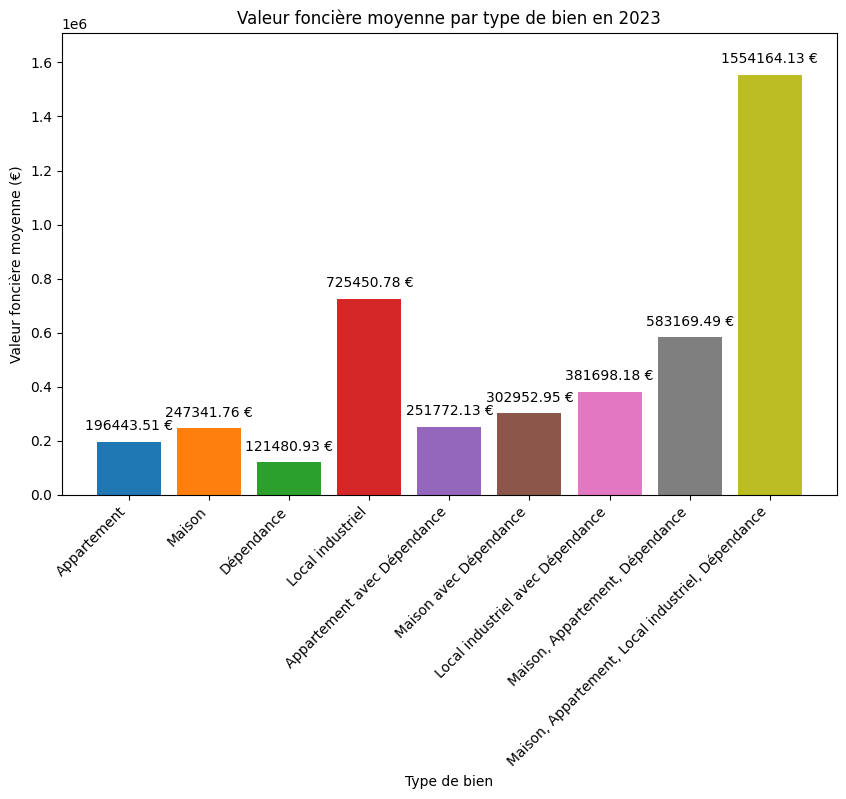

In [ ]:
types_biens = ['Appartement', 'Maison', 'Dépendance', 'Local industriel','Appartement avec Dépendance', 'Maison avec Dépendance', 'Local industriel avec Dépendance', 'Maison, Appartement, Dépendance', 'Maison, Appartement, Local industriel, Dépendance']
moyennes = [mean_appart2, mean_maison2, mean_dependance2, mean_localindust2,mean_appart_dep, mean_maison_dep, mean_localindust_dep, mean_maison_appart_dep, mean_maison_appart_localind_dep]
colors=sns.color_palette("tab10", 9)
plt.figure(figsize=(10, 6))
for i in range(len(types_biens)):
    plt.bar(types_biens[i], moyennes[i], color=colors[i % len(colors)])

plt.xlabel('Type de bien')
plt.ylabel('Valeur foncière moyenne (€)')
plt.title('Valeur foncière moyenne par type de bien en 2023')
plt.ylim(0, max(moyennes) * 1.1) # pour agrandir l'espace au-dessus de la barre la plus haute
plt.xticks(rotation=45, ha='right')
# affichage de la valeur au dessus des barres
for i, v in enumerate(moyennes):
    plt.text(i, v + (max(moyennes) * 0.02), f"{v:.2f} €", ha='center', va='bottom')

plt.show()

###### affichage df par types de logement

on voit qu'il y a beacoup plus d'apparts vendu avec des dépendances que des locals industriels comm.. vendu avec des dépendances
et on voit que c'est rare d'avoir des achats de (maison + appart + local + dépendance) combiné en même temps (428 ventes en tout en 2023)


In [ ]:
df_appart_dep
# 276952 ventes

,Date mutation,Adresse,Valeur fonciere,Code departement,Nombre de lots,Type local,Surface Carrez total,Surface reelle bati,Nombre pieces principales,Surface terrain
18,2023-01-02,0007 PL DU CHATEAU 6670 LA ROQUETTE SUR VAR,200000.0,06,4,"Appartement, Dépendance",122.00,64.0,3,0.0
39,2023-01-02,0026 RUE DES ALPES 92250 LA GARENNE-COLOMBES,515000.0,92,4,"Appartement, Dépendance",0.00,72.0,3,0.0
43,2023-01-02,0030 RUE CAMILLE PLAQUET 95540 MERY-SUR-OISE,336000.0,95,2,"Appartement, Dépendance",0.00,60.0,3,0.0
45,2023-01-02,0030 C RTE DE L'AURA 73130 SAINTE-MARIE-DE-CUINES,186000.0,73,0,"Appartement, Dépendance",0.00,148.0,7,1185.0
48,2023-01-02,0035 RUE ANATOLE FRANCE 63360 GERZAT,114200.0,63,2,"Appartement, Dépendance",65.50,65.0,3,0.0
...,...,...,...,...,...,...,...,...,...,...
1614520,2023-12-30,6938 ALL DU VERGER 29000 QUIMPER,200000.0,29,4,"Appartement, Dépendance",82.66,81.0,3,0.0
1614521,2023-12-30,7007 RUE RENEE MICHAUD 17000 LA ROCHELLE,274000.0,17,2,"Appartement, Dépendance",0.00,65.0,3,0.0
1614523,2023-12-30,7250 RUE DE LA PREFECTURE 21000 DIJON,97500.0,21,2,"Appartement, Dépendance",22.40,22.0,1,0.0
1614743,2023-12-31,5660 RUE DU VIEUX PORT 2100 SAINT QUENTIN,55000.0,02,4,"Appartement, Dépendance",97.58,44.0,2,0.0


In [ ]:
df_appart2
df_maison2
df_localindust2
df_dependance2
df_maison_dep
df_appart_dep
df_localindust_dep # tableau affiché -> 2553 ventes

,Date mutation,Adresse,Valeur fonciere,Code departement,Nombre de lots,Type local,Surface Carrez total,Surface reelle bati,Nombre pieces principales,Surface terrain
160,2023-01-02,0290 CHE DE LA MAVERIA 74290 VEYRIER-DU-LAC,1150000.0,74,8,"Local industriel. commercial ou assimilé, Dépe...",155.95,290.0,0,0.0
841,2023-01-03,0026 AV DE VALBERG 6470 PEONE,210000.0,06,2,"Local industriel. commercial ou assimilé, Dépe...",0.00,76.0,0,0.0
1760,2023-01-03,0641 AV DES DAUPHINS 64600 ANGLET,290000.0,64,2,"Local industriel. commercial ou assimilé, Dépe...",47.36,50.0,0,0.0
1838,2023-01-03,0780 PL GEORGES CLEMENCEAU 64200 BIARRITZ,1200000.0,64,2,"Local industriel. commercial ou assimilé, Dépe...",26.90,61.0,0,0.0
1847,2023-01-03,0797 ALL MARIE CURIE 29470 PLOUGASTEL-DAOULAS,126600.0,29,3,"Local industriel. commercial ou assimilé, Dépe...",0.00,58.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
1610602,2023-12-29,4740 AV JOFFRE 93800 EPINAY SUR SEINE,120000.0,93,5,"Local industriel. commercial ou assimilé, Dépe...",0.00,129.0,0,0.0
1611067,2023-12-29,9510 RUE DE TURIN 75008 PARIS 08,1900000.0,75,2,"Local industriel. commercial ou assimilé, Dépe...",0.00,212.0,0,0.0
1611819,2023-12-29,B022 LE CHEMIN DE LA VILLE AUX 2190 JUVINCOU...,230490.0,02,0,"Local industriel. commercial ou assimilé, Dépe...",0.00,124.0,0,426100.0
1612674,2023-12-29,B069 LES LAUNES 30240 LE GRAU DU ROI,8500.0,30,0,"Local industriel. commercial ou assimilé, Dépe...",0.00,600.0,0,2406.0


In [ ]:
df_maison_appart_dep
# 2051 ventes

,Date mutation,Adresse,Valeur fonciere,Code departement,Nombre de lots,Type local,Surface Carrez total,Surface reelle bati,Nombre pieces principales,Surface terrain
54,2023-01-02,0040 RUE D ALSACE 54300 LUNEVILLE,175500.0,54,0,"Maison, Appartement, Dépendance",0.00,233.0,12,880.0
980,2023-01-03,0060 RUE AMEDEE BONNET 1500 AMBERIEU-EN-BUGEY,322000.0,01,0,"Maison, Appartement, Dépendance",0.00,124.0,6,716.0
1209,2023-01-03,0150 QUAI PIERRE DUPONT 69270 ROCHETAILLEE-SU...,615000.0,69,0,"Maison, Appartement, Dépendance",0.00,86.0,3,705.0
2029,2023-01-03,1265 BD DU MAL JUIN 78200 MANTES-LA-JOLIE,230000.0,78,10,"Maison, Appartement, Dépendance",95.64,159.0,7,592.0
5730,2023-01-04,2312 RUE DU CROISSANT 44300 NANTES,150000.0,44,5,"Maison, Appartement, Dépendance",135.96,172.0,10,2008.0
...,...,...,...,...,...,...,...,...,...,...
1610212,2023-12-29,3086 ALL SISLEY 33600 PESSAC,1.0,33,0,"Maison, Appartement, Dépendance",0.00,1432.0,71,988760.0
1610749,2023-12-29,6000 AV MAL DE LATTRE DE TASSIGNY 33200 BORDEAUX,300000.0,33,0,"Maison, Appartement, Dépendance",0.00,141.0,6,0.0
1611083,2023-12-29,9665 AV VILLENEUVE ST GEORGES 94600 CHOISY-LE...,1966877.5,94,5,"Maison, Appartement, Dépendance",0.00,320.0,16,829.0
1612848,2023-12-29,B084 HAUT REFREN 83680 LA GARDE FREINET,895000.0,83,0,"Maison, Appartement, Dépendance",0.00,702.0,24,30480.0


In [ ]:
df_maison_appart_localind_dep 
# 428 ventes

,Date mutation,Adresse,Valeur fonciere,Code departement,Nombre de lots,Type local,Surface Carrez total,Surface reelle bati,Nombre pieces principales,Surface terrain
6384,2023-01-04,9115 RUE DE TURENNE 33000 BORDEAUX,4300000.0,33,0,"Maison, Appartement, Local industriel. commerc...",0.00,851.0,17,3054.0
7101,2023-01-04,B056 LE GAZ 73190 APREMONT,700000.0,73,0,"Maison, Appartement, Local industriel. commerc...",0.00,841.0,7,5722.0
8595,2023-01-05,0175 AV DE LA GARE 34310 QUARANTE,430000.0,34,0,"Maison, Appartement, Local industriel. commerc...",0.00,365.0,6,2200.0
9494,2023-01-05,1040 RUE DARDAULT 36100 ISSOUDUN,269100.0,36,0,"Maison, Appartement, Local industriel. commerc...",0.00,297.0,8,1484.0
19990,2023-01-09,0140 RUE DE LA REPUBLIQUE 33230 SAINT-MEDARD-...,250000.0,33,0,"Maison, Appartement, Local industriel. commerc...",0.00,427.0,11,2500.0
...,...,...,...,...,...,...,...,...,...,...
1602469,2023-12-28,4452 RUE DES HAIES 75020 PARIS 20,1659400.0,75,9,"Maison, Appartement, Local industriel. commerc...",143.24,365.0,9,0.0
1607505,2023-12-29,0150 BD GEORGES MICHEL 91100 CORBEIL ESSONNES,NaN,91,0,"Maison, Appartement, Local industriel. commerc...",0.00,5788.0,19,74102.0
1607669,2023-12-29,0191 CHE DE PEYREHITTE 65710 CAMPAN,500000.0,65,0,"Maison, Appartement, Local industriel. commerc...",0.00,1943.0,17,44835.0
1609028,2023-12-29,0844 ALL DE COYOL 87270 COUZEIX,427500.0,87,0,"Maison, Appartement, Local industriel. commerc...",0.00,10336.0,208,723164.0


## Visualisation Prix moyen du mètre carré

### ECHELLE FRANCE

#### Calcul du prix au m² pour chaque type de local

##### prix/m² Appartements

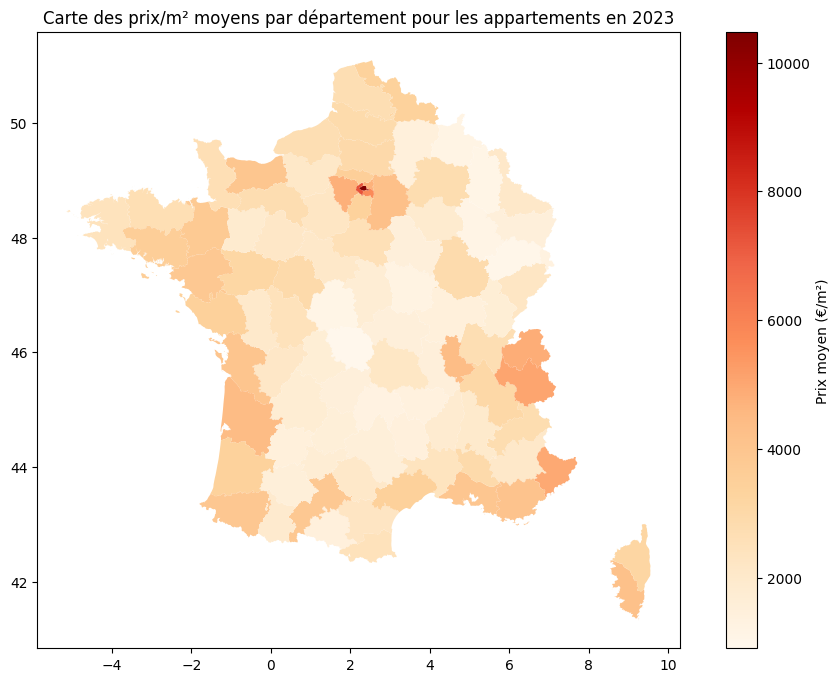

In [202]:
import geopandas as gpd

# Recuperation des données géographiques
departements_geojson = 'https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements.geojson'
departements = gpd.read_file(departements_geojson)

#print(departements.columns)
departements = departements[['code', 'nom', 'geometry']]
departements = departements.rename(columns={'code': 'Code departement', 'nom': 'Nom departement'})

# Filtre
df_appart2 = group_df[group_df['Type local'] == 'Appartement']
df_appart2 = df_appart2[df_appart2['Surface reelle bati'].notnull() & (df_appart2['Surface reelle bati'] > 0)]
# prix au mètre carré
df_appart2['Prix_m2'] = df_appart2['Valeur fonciere'] / df_appart2['Surface reelle bati']
# prix moyens par département
departement_prices_appart = df_appart2.groupby('Code departement')['Prix_m2'].mean().reset_index()
# merge avec les données géographiques
france_departements_appart = departements.merge(departement_prices_appart, on='Code departement')

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
france_departements_appart.plot(column='Prix_m2', ax=ax, legend=True, legend_kwds={'label': "Prix moyen (€/m²)"}, cmap='OrRd')
plt.title('Carte des prix/m² moyens par département pour les appartements en 2023')
plt.show()

##### Prix/m² Maisons

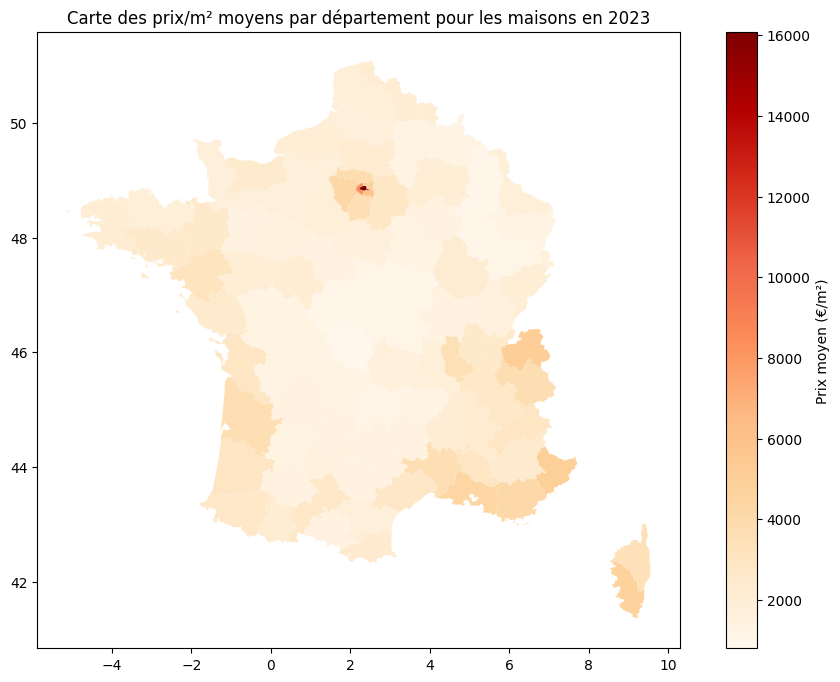

In [201]:
import geopandas as gpd

# Recuperation des données géographiques
departements_geojson = 'https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements.geojson'
departements = gpd.read_file(departements_geojson)

#print(departements.columns)
departements = departements[['code', 'nom', 'geometry']]
departements = departements.rename(columns={'code': 'Code departement', 'nom': 'Nom departement'})

# Filtre
df_maison2 = group_df[group_df['Type local'] == 'Maison']
df_maison2 = df_maison2[df_maison2['Surface reelle bati'].notnull() & (df_maison2['Surface reelle bati'] > 0)]
# prix au mètre carré
df_maison2['Prix_m2'] = df_maison2['Valeur fonciere'] / df_maison2['Surface reelle bati']
# prix moyens par département
departement_prices_maison = df_maison2.groupby('Code departement')['Prix_m2'].mean().reset_index()
# merge avec les données géographiques
france_departements_maison = departements.merge(departement_prices_maison, on='Code departement')

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
france_departements_maison.plot(column='Prix_m2', ax=ax, legend=True, legend_kwds={'label': "Prix moyen (€/m²)"}, cmap='OrRd')
plt.title('Carte des prix/m² moyens par département pour les maisons en 2023')
plt.show()

##### Prix/m² Dépendances

In [198]:
group_df['Type local'].unique()

array(['', 'Maison, Dépendance', 'Maison', 'Appartement, Dépendance',
       'Local industriel. commercial ou assimilé',
       'Maison, Appartement, Dépendance', 'Appartement',
       'Appartement, Local industriel. commercial ou assimilé',
       'Dépendance',
       'Local industriel. commercial ou assimilé, Dépendance',
       'Maison, Local industriel. commercial ou assimilé',
       'Appartement, Local industriel. commercial ou assimilé, Dépendance',
       'Maison, Local industriel. commercial ou assimilé, Dépendance',
       'Maison, Appartement, Local industriel. commercial ou assimilé',
       'Maison, Appartement',
       'Maison, Appartement, Local industriel. commercial ou assimilé, Dépendance'],
      dtype=object)

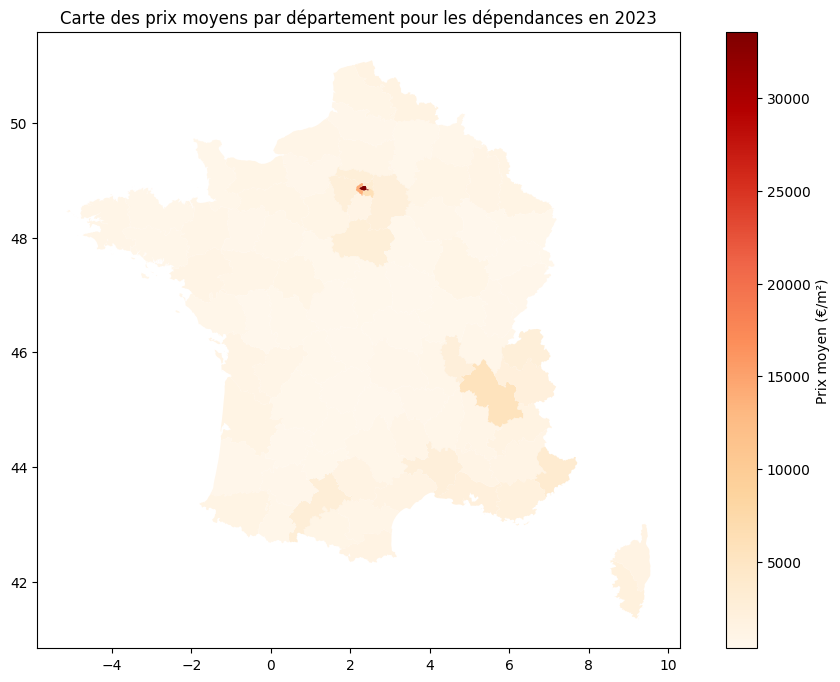

In [204]:
import geopandas as gpd

# Recuperation des données géographiques
departements_geojson = 'https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements.geojson'
departements = gpd.read_file(departements_geojson)

#print(departements.columns)
departements = departements[['code', 'nom', 'geometry']]
departements = departements.rename(columns={'code': 'Code departement', 'nom': 'Nom departement'})

# Filtre
df_dependance2 = df[df['Type local'] == 'Dépendance']
df_dependance2 = df_dependance2[df_dependance2['Surface terrain'].notnull() & (df_dependance2['Surface terrain'] > 0)]
# prix au mètre carré
df_dependance2['Prix_m2'] = df_dependance2['Valeur fonciere'] / df_dependance2['Surface terrain']
# prix moyens par département
departement_prices_dependance = df_dependance2.groupby('Code departement')['Prix_m2'].mean().reset_index()
# merge avec les données géographiques
france_departements_dependance = departements.merge(departement_prices_dependance, on='Code departement')

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
france_departements_dependance.plot(column='Prix_m2', ax=ax, legend=True, legend_kwds={'label': "Prix moyen (€/m²)"}, cmap='OrRd')
plt.title('Carte des prix moyens par département pour les dépendances en 2023')
plt.show()

### ECHELLE DEPARTEMENT : Paris 75

#### Appartement

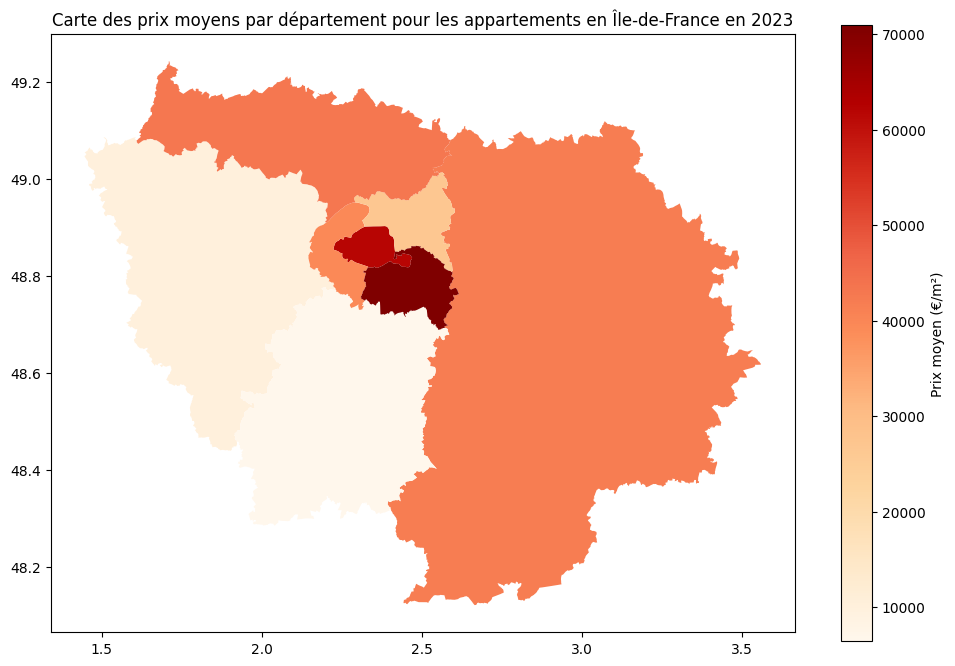

In [171]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

departements_geojson = 'https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements.geojson'
departements = gpd.read_file(departements_geojson)

ile_de_france_codes = ['75', '77', '78', '91', '92', '93', '94', '95']

# filtre données du geojson ile-de-france
departements_idf = departements[departements['code'].isin(ile_de_france_codes)]
# filtre appart et données non nulles
df_appart = df[df['Type local'] == 'Appartement']
df_appart = df_appart[df_appart['Surface reelle bati'].notnull() & (df_appart['Surface reelle bati'] > 0)]
# calcul du prix au mètre carré
df_appart['Prix_m2'] = df_appart['Valeur fonciere'] / df_appart['Surface reelle bati']
# filtre de la dataframe ile-de-France
df_appart_idf = df_appart[df_appart['Code departement'].isin(ile_de_france_codes)]
# prix moyens par département
departement_prices_appart_idf = df_appart_idf.groupby('Code departement')['Prix_m2'].mean().reset_index()
# merge avec les données géographiques
france_departements_appart_idf = departements_idf.merge(departement_prices_appart_idf, left_on='code', right_on='Code departement')

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
france_departements_appart_idf.plot(column='Prix_m2', ax=ax, legend=True, legend_kwds={'label': "Prix moyen (€/m²)"}, cmap='OrRd')
plt.title('Carte des prix moyens par département pour les appartements en Île-de-France en 2023')
plt.show()


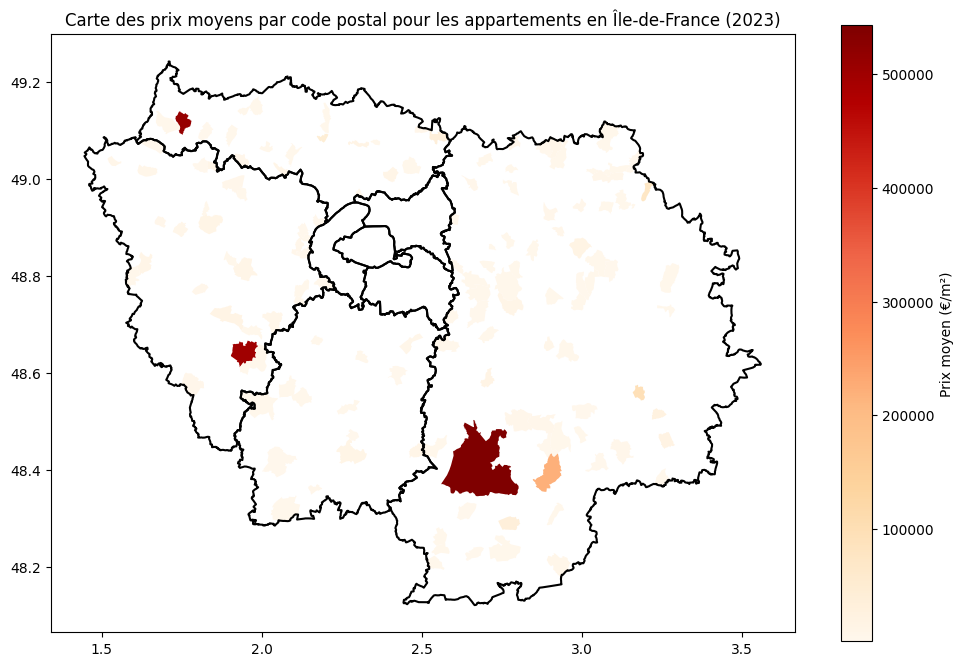

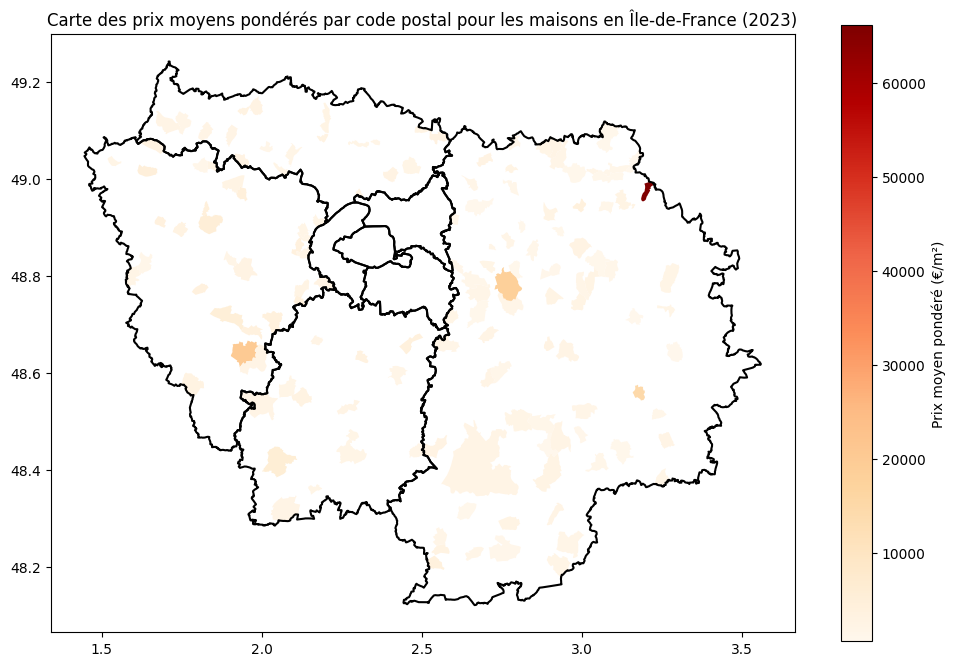

In [179]:
# Charger les données géographiques des codes postaux
geojson_url_communes = 'https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/communes.geojson'
geojson_url_departements = 'https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements.geojson'

communes = gpd.read_file(geojson_url_communes)
departements = gpd.read_file(geojson_url_departements)

# Filtrer les communes pour le département de l'Île-de-France (codes postaux des départements 75, 77, 78, 91, 92, 93, 94, 95)
idf_departements = ['75', '77', '78', '91', '92', '93', '94', '95']
communes_idf = communes[communes['code'].str[:2].isin(idf_departements)]
departements_idf = departements[departements['code'].isin(idf_departements)]

# Filtrer les données pour les appartements
df_appart = df[df['Type local'] == 'Appartement']
df_appart = df_appart[df_appart['Surface reelle bati'].notnull() & (df_appart['Surface reelle bati'] > 0)]
df_appart['Prix_m2'] = df_appart['Valeur fonciere'] / df_appart['Surface reelle bati']

# Filtrer les données pour les maisons
df_maison = df[df['Type local'] == 'Maison']
df_maison = df_maison[df_maison['Surface reelle bati'].notnull() & (df_maison['Surface reelle bati'] > 0)]

# Appliquer un facteur de pondération à la surface terrain
terrain_weight = 0.2
df_maison['Surface_ponderee'] = df_maison['Surface reelle bati'] + (terrain_weight * df_maison['Surface terrain'].fillna(0))
df_maison['Prix_m2_pondere'] = df_maison['Valeur fonciere'] / df_maison['Surface_ponderee']

# Calculer les prix moyens par code postal pour les appartements et les maisons
codepostal_prices_appart = df_appart.groupby('Code postal')['Prix_m2'].mean().reset_index()
codepostal_prices_maison = df_maison.groupby('Code postal')['Prix_m2_pondere'].mean().reset_index()

# Merge avec les données géographiques des communes de l'Île-de-France
communes_appart_idf = communes_idf.merge(codepostal_prices_appart, left_on='code', right_on='Code postal', how='left')
communes_maison_idf = communes_idf.merge(codepostal_prices_maison, left_on='code', right_on='Code postal', how='left')

# Plot de la carte pour les appartements en Île-de-France
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
communes_appart_idf.plot(column='Prix_m2', ax=ax, legend=True,
                         legend_kwds={'label': "Prix moyen (€/m²)"},
                         cmap='OrRd')
departements_idf.boundary.plot(ax=ax, color='black')
plt.title("Carte des prix moyens par code postal pour les appartements en Île-de-France (2023)")
plt.show()

# Plot de la carte pour les maisons en Île-de-France
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
communes_maison_idf.plot(column='Prix_m2_pondere', ax=ax, legend=True,
                         legend_kwds={'label': "Prix moyen pondéré (€/m²)"},
                         cmap='OrRd')
departements_idf.boundary.plot(ax=ax, color='black')
plt.title("Carte des prix moyens pondérés par code postal pour les maisons en Île-de-France (2023)")
plt.show()


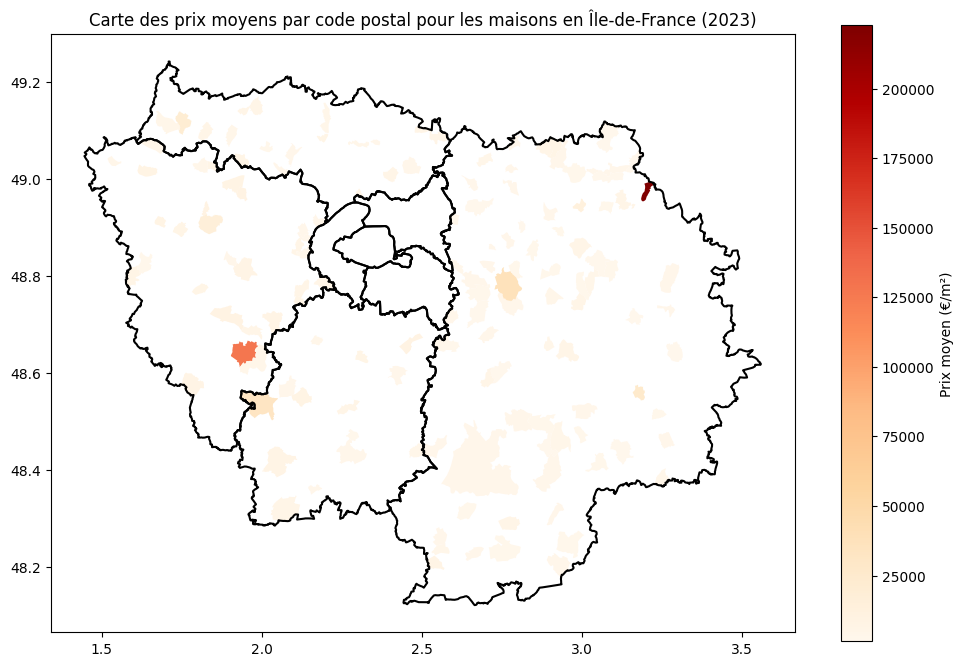

In [181]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Vérifier le format des codes postaux
df['Code postal'] = df['Code postal'].astype(str)

# Charger les données géographiques des codes postaux et départements
geojson_url_communes = 'https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/communes.geojson'
geojson_url_departements = 'https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements.geojson'

communes = gpd.read_file(geojson_url_communes)
departements = gpd.read_file(geojson_url_departements)

# Filtrer les communes pour le département de l'Île-de-France (codes postaux des départements 75, 77, 78, 91, 92, 93, 94, 95)
idf_departements = ['75', '77', '78', '91', '92', '93', '94', '95']
communes_idf = communes[communes['code'].str[:2].isin(idf_departements)]
departements_idf = departements[departements['code'].isin(idf_departements)]

# Filtrer les données pour les maisons
df_maison = df[df['Type local'] == 'Maison']
df_maison = df_maison[df_maison['Surface reelle bati'].notnull() & (df_maison['Surface reelle bati'] > 0)]
df_maison['Prix_m2'] = df_maison['Valeur fonciere'] / df_maison['Surface reelle bati']

# Calculer les prix moyens par code postal pour les maisons
codepostal_prices_maison = df_maison.groupby('Code postal')['Prix_m2'].mean().reset_index()

# Merge avec les données géographiques des communes de l'Île-de-France
communes_maison_idf = communes_idf.merge(codepostal_prices_maison, left_on='code', right_on='Code postal', how='left')

# Plot de la carte pour les maisons en Île-de-France
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
communes_maison_idf.plot(column='Prix_m2', ax=ax, legend=True,
                         legend_kwds={'label': "Prix moyen (€/m²)"},
                         cmap='OrRd')
departements_idf.boundary.plot(ax=ax, color='black')
plt.title("Carte des prix moyens par code postal pour les maisons en Île-de-France (2023)")
plt.show()



df_local=

df_dependance=

df_maison=

##### Tout types de biens confondus

#### Normandie

### Prix moyen du mètre carré d'une ville

## Comparaison entre différents types (appart, maison)

# Geomap France